In [85]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential

In [39]:
#Image pre-processing

In [66]:
#Lorin directory
# animals10 = r'C:\Users\Feldevaye\Documents\GitHub\AI-Engineer-Bootcamp\Project\Animals-10 DS'
#Pedro directory
animals10 = r'C:\Users\Pedro\Documents\Ironhack\ThirdWeek\Project_1\Animals_10_DS'

In [67]:
categories = os.listdir(animals10)
print(categories)
for category in categories:
    path = os.path.join(animals10, category)
    images = os.listdir(path)
    print(f"{category}: {len(images)} images")

['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
cane: 4863 images
cavallo: 2623 images
elefante: 1446 images
farfalla: 2112 images
gallina: 3098 images
gatto: 1668 images
mucca: 1866 images
pecora: 1820 images
ragno: 4821 images
scoiattolo: 1862 images


In [68]:
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 20

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  )

In [69]:
train_generator = train_datagen.flow_from_directory(
    animals10,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',)

validation_generator = train_datagen.flow_from_directory(
    animals10,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',)

Found 26179 images belonging to 10 classes.
Found 26179 images belonging to 10 classes.


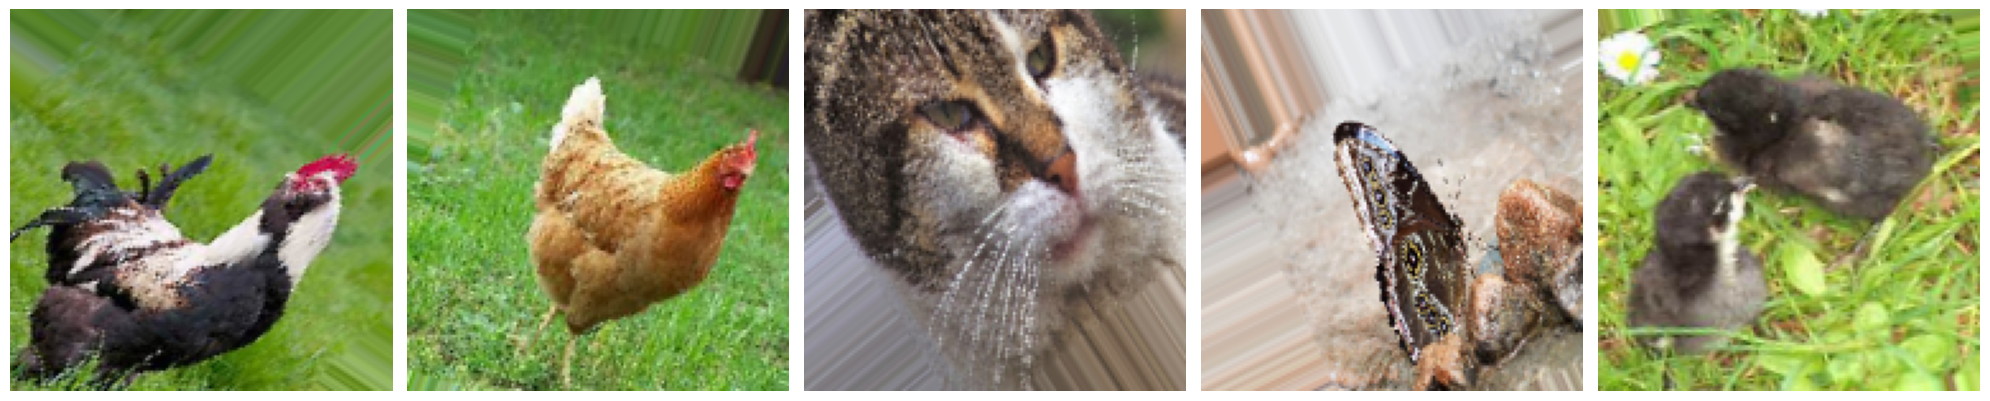

In [70]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

sample_training_images, _ = next(train_generator)
plotImages(sample_training_images[:10])

In [45]:
"""Approach: We want to experiment and find out which is the way to get the best possible output. 
For that, we will experiment with different activation functions: relu,elu, selu and leaky relu
We also want to try different optimization methods"""

'Approach: We want to experiment and find out which is the way to get the best possible output. \nFor that, we will experiment with different activation functions: relu,elu, selu and leaky relu\nWe also want to try different optimization methods'

In [71]:
activation_functions = ['relu', 'elu', 'selu']
optimizers = [SGD(learning_rate=0.01), Adam(learning_rate=0.001), RMSprop(learning_rate=0.001)]

In [54]:
def build_cnn_model(activation):
    model = tf.keras.Sequential([

        # Define the first convolutional layer
        tf.keras.layers.Conv2D(24, (3, 3), activation=activation, input_shape=(150, 150, 3)),

        # Define the first max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),

        # Define the second convolutional layer
        tf.keras.layers.Conv2D(36, (3, 3), activation=activation),

        # Define the second max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation=activation),
        tf.keras.layers.Dense(128, activation=activation),

        # Define the last Dense layer to output the classification
        # probabilities
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    return model

Epoch 1/10
40/40 - 6s - loss: 2.2522 - accuracy: 0.1813 - val_loss: 2.2045 - val_accuracy: 0.1825
Epoch 2/10
40/40 - 5s - loss: 2.2054 - accuracy: 0.2113 - val_loss: 2.1632 - val_accuracy: 0.1875
Epoch 3/10
40/40 - 6s - loss: 2.1477 - accuracy: 0.2075 - val_loss: 2.2843 - val_accuracy: 0.2000
Epoch 4/10
40/40 - 6s - loss: 2.0827 - accuracy: 0.2663 - val_loss: 2.2649 - val_accuracy: 0.2175
Epoch 5/10
40/40 - 6s - loss: 2.1254 - accuracy: 0.2463 - val_loss: 2.0498 - val_accuracy: 0.2725
Epoch 6/10
40/40 - 6s - loss: 2.1008 - accuracy: 0.2525 - val_loss: 2.0917 - val_accuracy: 0.2375
Epoch 7/10
40/40 - 6s - loss: 2.0292 - accuracy: 0.2862 - val_loss: 2.0329 - val_accuracy: 0.3125
Epoch 8/10
40/40 - 6s - loss: 2.0830 - accuracy: 0.2488 - val_loss: 1.9633 - val_accuracy: 0.3275
Epoch 9/10
40/40 - 6s - loss: 1.9117 - accuracy: 0.3338 - val_loss: 1.9606 - val_accuracy: 0.2975
Epoch 10/10
40/40 - 6s - loss: 1.9978 - accuracy: 0.2975 - val_loss: 1.9373 - val_accuracy: 0.2900
1309/1309 - 93s - l

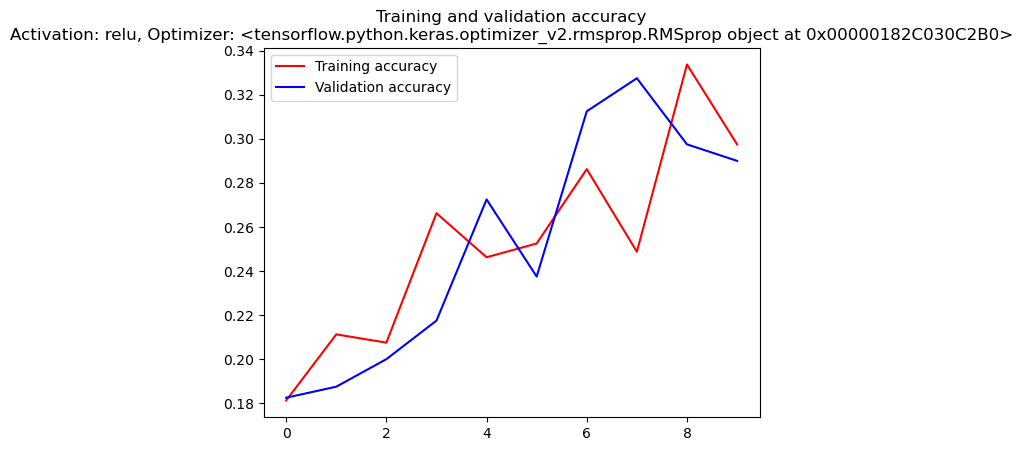

<Figure size 640x480 with 0 Axes>

In [72]:
#This is the simplified version for quick testing of the pre-processing of the data and the cnn structure
# We build the model with the given activation function
activation = 'relu'
model = build_cnn_model(activation)
        
# We compile the model with the given optimizer
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy',metrics=['accuracy'])
        
# Train the model
history = model.fit(
    train_generator,
    validation_data = validation_generator,
    steps_per_epoch = len(train_generator),
    epochs = 10,
    validation_steps = len(validation_generator),
    verbose = 2)
        
# Evaluate the model
test_loss, test_acc = model.evaluate(validation_generator, verbose=2)
        
# Plot training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
    
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title(f'Training and validation accuracy\nActivation: {activation}, Optimizer: {optimizer}')
plt.legend(loc=0)
plt.figure()
plt.show()

Epoch 1/10
40/40 - 6s - loss: 2.2293 - accuracy: 0.1912 - val_loss: 2.2182 - val_accuracy: 0.1700
Epoch 2/10
40/40 - 6s - loss: 2.1889 - accuracy: 0.2062 - val_loss: 2.1918 - val_accuracy: 0.1625
Epoch 3/10
40/40 - 6s - loss: 2.1854 - accuracy: 0.1925 - val_loss: 2.1701 - val_accuracy: 0.1775
Epoch 4/10
40/40 - 6s - loss: 2.2062 - accuracy: 0.2025 - val_loss: 2.2022 - val_accuracy: 0.1550
Epoch 5/10
40/40 - 6s - loss: 2.2128 - accuracy: 0.1850 - val_loss: 2.2031 - val_accuracy: 0.2275
Epoch 6/10
40/40 - 6s - loss: 2.2046 - accuracy: 0.2150 - val_loss: 2.1793 - val_accuracy: 0.2625
Epoch 7/10
40/40 - 6s - loss: 2.2039 - accuracy: 0.2188 - val_loss: 2.1922 - val_accuracy: 0.2075
Epoch 8/10
40/40 - 6s - loss: 2.1951 - accuracy: 0.1963 - val_loss: 2.1946 - val_accuracy: 0.2200
Epoch 9/10
40/40 - 6s - loss: 2.1869 - accuracy: 0.2262 - val_loss: 2.2288 - val_accuracy: 0.1550
Epoch 10/10
40/40 - 6s - loss: 2.1659 - accuracy: 0.2250 - val_loss: 2.1737 - val_accuracy: 0.2300
1309/1309 - 94s - l

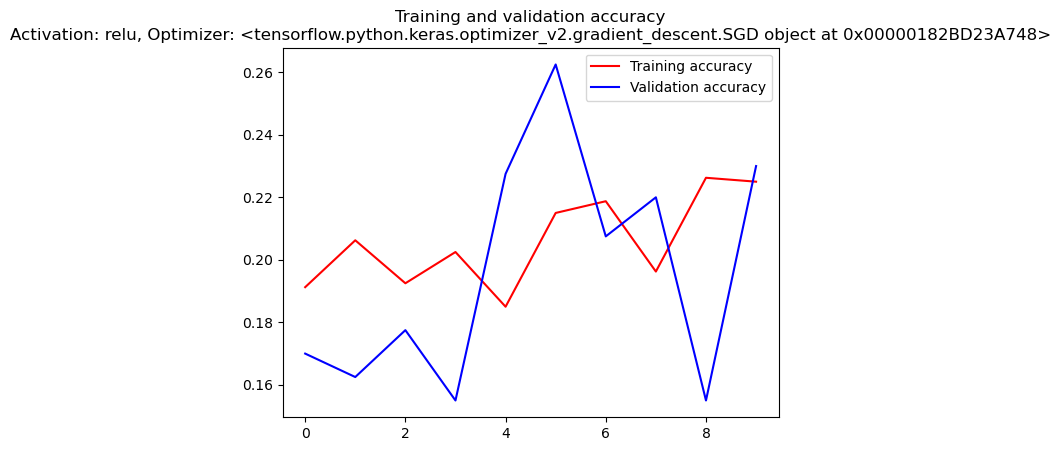

<Figure size 640x480 with 0 Axes>

Activation: relu, Optimizer: SGD, Test Accuracy: 0.23228542506694794
Epoch 1/10
40/40 - 6s - loss: 2.2145 - accuracy: 0.1775 - val_loss: 2.2138 - val_accuracy: 0.1750
Epoch 2/10
40/40 - 6s - loss: 2.2282 - accuracy: 0.1700 - val_loss: 2.1718 - val_accuracy: 0.1700
Epoch 3/10
40/40 - 6s - loss: 2.1937 - accuracy: 0.2288 - val_loss: 2.1519 - val_accuracy: 0.2225
Epoch 4/10
40/40 - 6s - loss: 2.1061 - accuracy: 0.2387 - val_loss: 2.0796 - val_accuracy: 0.2675
Epoch 5/10
40/40 - 6s - loss: 2.0956 - accuracy: 0.2425 - val_loss: 2.0948 - val_accuracy: 0.2425
Epoch 6/10
40/40 - 6s - loss: 2.0920 - accuracy: 0.2525 - val_loss: 1.9962 - val_accuracy: 0.3350
Epoch 7/10
40/40 - 5s - loss: 2.0271 - accuracy: 0.2788 - val_loss: 2.0491 - val_accuracy: 0.2425
Epoch 8/10
40/40 - 5s - loss: 2.0598 - accuracy: 0.2475 - val_loss: 2.0328 - val_accuracy: 0.2850
Epoch 9/10
40/40 - 6s - loss: 1.9355 - accuracy: 0.2937 - val_loss: 1.9082 - val_accuracy: 0.3075
Epoch 10/10
40/40 - 5s - loss: 1.9807 - accuracy:

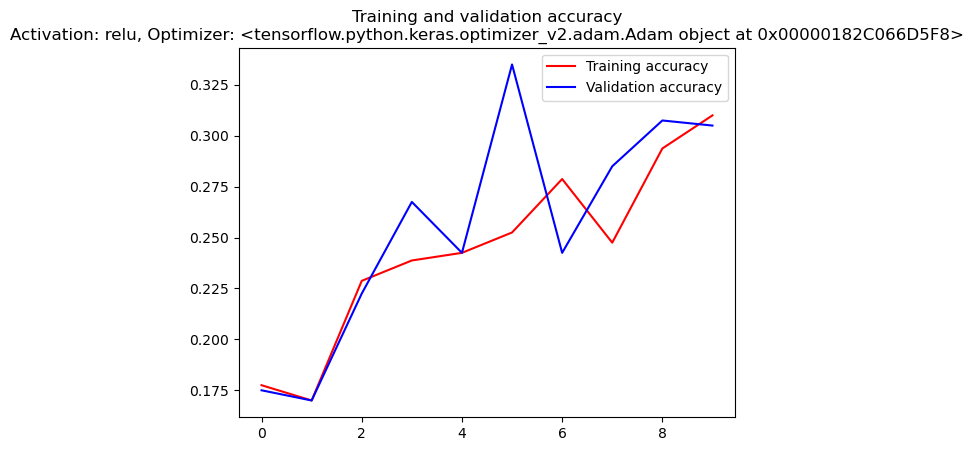

<Figure size 640x480 with 0 Axes>

Activation: relu, Optimizer: Adam, Test Accuracy: 0.2877497375011444
Epoch 1/10
40/40 - 6s - loss: 2.6754 - accuracy: 0.1887 - val_loss: 2.1021 - val_accuracy: 0.2425
Epoch 2/10
40/40 - 6s - loss: 2.2163 - accuracy: 0.1850 - val_loss: 2.1820 - val_accuracy: 0.1600
Epoch 3/10
40/40 - 6s - loss: 2.1640 - accuracy: 0.2163 - val_loss: 2.4228 - val_accuracy: 0.1275
Epoch 4/10
40/40 - 6s - loss: 2.1431 - accuracy: 0.2315 - val_loss: 2.2339 - val_accuracy: 0.1525
Epoch 5/10
40/40 - 6s - loss: 2.1458 - accuracy: 0.2500 - val_loss: 2.1021 - val_accuracy: 0.2850
Epoch 6/10
40/40 - 6s - loss: 2.0641 - accuracy: 0.2612 - val_loss: 1.9849 - val_accuracy: 0.3000
Epoch 7/10
40/40 - 6s - loss: 1.9912 - accuracy: 0.2775 - val_loss: 2.0431 - val_accuracy: 0.2525
Epoch 8/10
40/40 - 6s - loss: 1.9804 - accuracy: 0.2804 - val_loss: 1.8960 - val_accuracy: 0.3425
Epoch 9/10
40/40 - 6s - loss: 1.9669 - accuracy: 0.3137 - val_loss: 1.7735 - val_accuracy: 0.3725
Epoch 10/10
40/40 - 6s - loss: 1.9249 - accuracy:

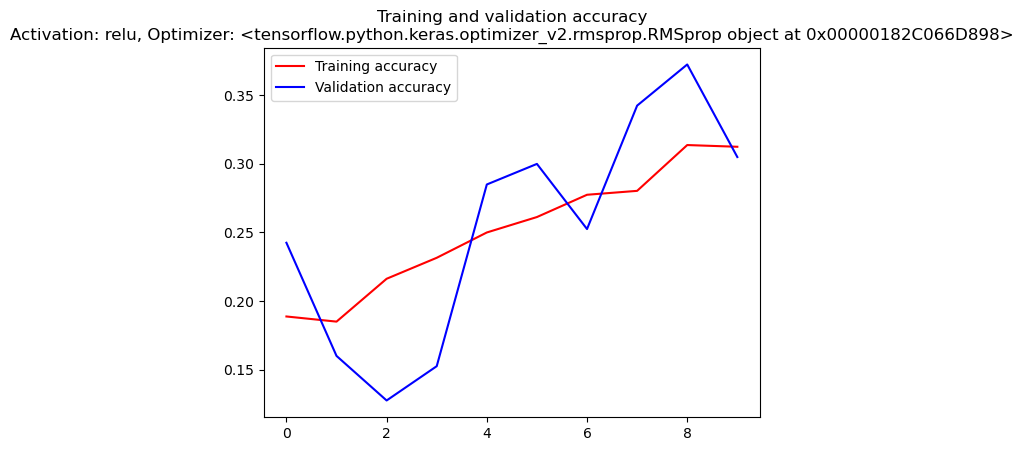

<Figure size 640x480 with 0 Axes>

Activation: relu, Optimizer: RMSprop, Test Accuracy: 0.3440161943435669
Epoch 1/10
40/40 - 6s - loss: 2.2523 - accuracy: 0.1637 - val_loss: 2.2515 - val_accuracy: 0.1650
Epoch 2/10
40/40 - 6s - loss: 2.1943 - accuracy: 0.1875 - val_loss: 2.1650 - val_accuracy: 0.2000
Epoch 3/10
40/40 - 6s - loss: 2.1749 - accuracy: 0.2013 - val_loss: 2.1210 - val_accuracy: 0.2200
Epoch 4/10
40/40 - 6s - loss: 2.1348 - accuracy: 0.2262 - val_loss: 2.1263 - val_accuracy: 0.2475
Epoch 5/10
40/40 - 6s - loss: 2.1290 - accuracy: 0.2225 - val_loss: 2.1189 - val_accuracy: 0.2050
Epoch 6/10
40/40 - 6s - loss: 2.1045 - accuracy: 0.2350 - val_loss: 2.0516 - val_accuracy: 0.2550
Epoch 7/10
40/40 - 5s - loss: 2.0440 - accuracy: 0.2713 - val_loss: 2.0072 - val_accuracy: 0.2875
Epoch 8/10
40/40 - 6s - loss: 2.0445 - accuracy: 0.2475 - val_loss: 2.0437 - val_accuracy: 0.2600
Epoch 9/10
40/40 - 6s - loss: 2.0052 - accuracy: 0.2763 - val_loss: 2.0007 - val_accuracy: 0.2750
Epoch 10/10
40/40 - 6s - loss: 2.0122 - accura

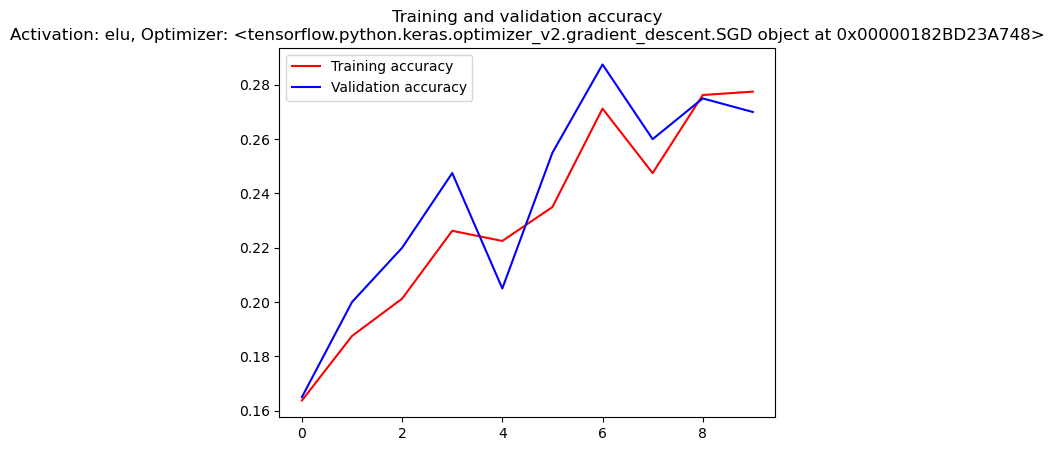

<Figure size 640x480 with 0 Axes>

Activation: elu, Optimizer: SGD, Test Accuracy: 0.27208831906318665
Epoch 1/10
40/40 - 6s - loss: 6.4279 - accuracy: 0.1612 - val_loss: 2.1941 - val_accuracy: 0.2425
Epoch 2/10
40/40 - 6s - loss: 2.1834 - accuracy: 0.2250 - val_loss: 2.0522 - val_accuracy: 0.2775
Epoch 3/10
40/40 - 6s - loss: 2.1739 - accuracy: 0.1988 - val_loss: 2.1183 - val_accuracy: 0.2200
Epoch 4/10
40/40 - 6s - loss: 2.1449 - accuracy: 0.2325 - val_loss: 2.3299 - val_accuracy: 0.2475
Epoch 5/10
40/40 - 6s - loss: 2.2974 - accuracy: 0.1863 - val_loss: 2.2299 - val_accuracy: 0.1925
Epoch 6/10
40/40 - 6s - loss: 2.1853 - accuracy: 0.2275 - val_loss: 2.1877 - val_accuracy: 0.2200
Epoch 7/10
40/40 - 6s - loss: 2.1907 - accuracy: 0.2350 - val_loss: 2.1402 - val_accuracy: 0.2525
Epoch 8/10
40/40 - 6s - loss: 2.1168 - accuracy: 0.2562 - val_loss: 2.1104 - val_accuracy: 0.2225
Epoch 9/10
40/40 - 5s - loss: 2.0632 - accuracy: 0.2663 - val_loss: 2.0424 - val_accuracy: 0.2800
Epoch 10/10
40/40 - 6s - loss: 2.0292 - accuracy: 

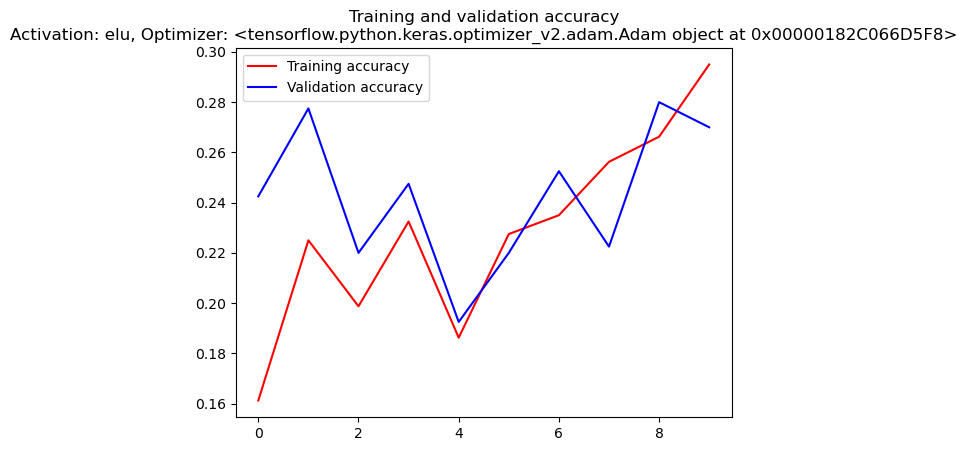

<Figure size 640x480 with 0 Axes>

Activation: elu, Optimizer: Adam, Test Accuracy: 0.2575346529483795
Epoch 1/10
40/40 - 6s - loss: 4.9920 - accuracy: 0.1412 - val_loss: 2.7500 - val_accuracy: 0.1550
Epoch 2/10
40/40 - 6s - loss: 2.3803 - accuracy: 0.1612 - val_loss: 2.5061 - val_accuracy: 0.1250
Epoch 3/10
40/40 - 6s - loss: 2.3233 - accuracy: 0.2025 - val_loss: 2.3804 - val_accuracy: 0.1950
Epoch 4/10
40/40 - 6s - loss: 2.3867 - accuracy: 0.2075 - val_loss: 2.2313 - val_accuracy: 0.1975
Epoch 5/10
40/40 - 6s - loss: 2.1857 - accuracy: 0.2400 - val_loss: 2.0331 - val_accuracy: 0.2675
Epoch 6/10
40/40 - 6s - loss: 2.2058 - accuracy: 0.2237 - val_loss: 2.0880 - val_accuracy: 0.2675
Epoch 7/10
40/40 - 6s - loss: 2.2313 - accuracy: 0.2062 - val_loss: 2.0924 - val_accuracy: 0.2250
Epoch 8/10
40/40 - 6s - loss: 2.1667 - accuracy: 0.2412 - val_loss: 2.0528 - val_accuracy: 0.2800
Epoch 9/10
40/40 - 6s - loss: 2.1384 - accuracy: 0.2288 - val_loss: 2.0957 - val_accuracy: 0.2350
Epoch 10/10
40/40 - 6s - loss: 2.1649 - accuracy: 

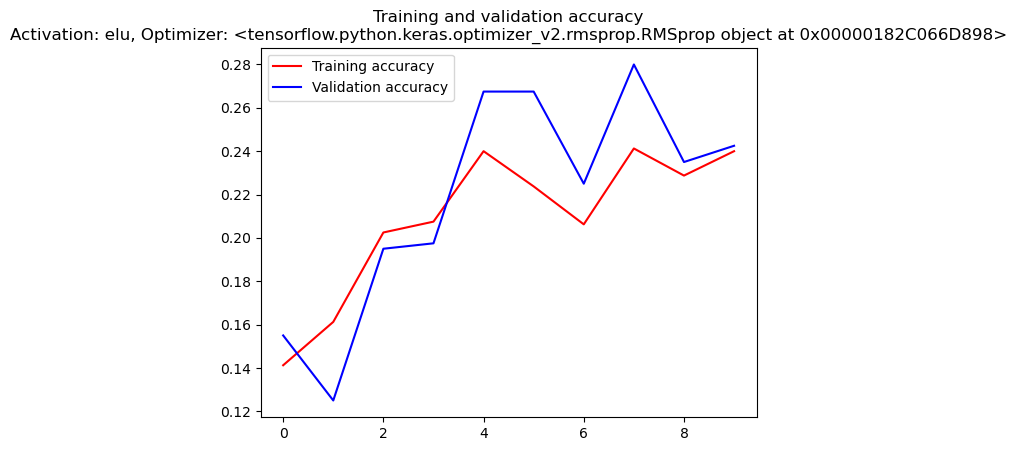

<Figure size 640x480 with 0 Axes>

Activation: elu, Optimizer: RMSprop, Test Accuracy: 0.23499751091003418
Epoch 1/10
40/40 - 6s - loss: nan - accuracy: 0.1688 - val_loss: nan - val_accuracy: 0.1750
Epoch 2/10
40/40 - 6s - loss: nan - accuracy: 0.1900 - val_loss: nan - val_accuracy: 0.1825
Epoch 3/10
40/40 - 6s - loss: nan - accuracy: 0.1825 - val_loss: nan - val_accuracy: 0.1600
Epoch 4/10
40/40 - 6s - loss: nan - accuracy: 0.1850 - val_loss: nan - val_accuracy: 0.1950
Epoch 5/10
40/40 - 6s - loss: nan - accuracy: 0.1775 - val_loss: nan - val_accuracy: 0.2050
Epoch 6/10
40/40 - 5s - loss: nan - accuracy: 0.1863 - val_loss: nan - val_accuracy: 0.2125
Epoch 7/10
40/40 - 5s - loss: nan - accuracy: 0.1800 - val_loss: nan - val_accuracy: 0.1625
Epoch 8/10
40/40 - 6s - loss: nan - accuracy: 0.1825 - val_loss: nan - val_accuracy: 0.1475
Epoch 9/10
40/40 - 5s - loss: nan - accuracy: 0.1887 - val_loss: nan - val_accuracy: 0.1800
Epoch 10/10
40/40 - 6s - loss: nan - accuracy: 0.1937 - val_loss: nan - val_accuracy: 0.1750
1309/13

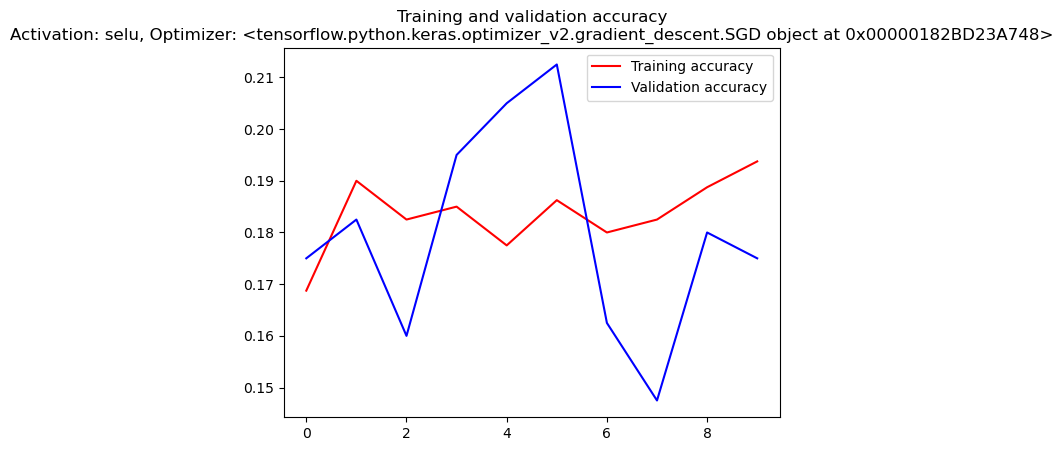

<Figure size 640x480 with 0 Axes>

Activation: selu, Optimizer: SGD, Test Accuracy: 0.18575957417488098
Epoch 1/10
40/40 - 6s - loss: 11.4617 - accuracy: 0.1338 - val_loss: 2.6102 - val_accuracy: 0.1925
Epoch 2/10
40/40 - 6s - loss: 2.2915 - accuracy: 0.1825 - val_loss: 2.2330 - val_accuracy: 0.1725
Epoch 3/10
40/40 - 6s - loss: 2.2501 - accuracy: 0.1750 - val_loss: 2.2604 - val_accuracy: 0.1925
Epoch 4/10
40/40 - 6s - loss: 2.2346 - accuracy: 0.1963 - val_loss: 2.3790 - val_accuracy: 0.1750
Epoch 5/10
40/40 - 6s - loss: 2.2592 - accuracy: 0.1775 - val_loss: 2.2684 - val_accuracy: 0.1775
Epoch 6/10
40/40 - 6s - loss: 2.2215 - accuracy: 0.1900 - val_loss: 2.2778 - val_accuracy: 0.1725
Epoch 7/10
40/40 - 6s - loss: 2.2265 - accuracy: 0.1725 - val_loss: 2.2504 - val_accuracy: 0.1875
Epoch 8/10
40/40 - 6s - loss: 2.1954 - accuracy: 0.1912 - val_loss: 2.2028 - val_accuracy: 0.1925
Epoch 9/10
40/40 - 6s - loss: 2.2271 - accuracy: 0.1690 - val_loss: 2.2384 - val_accuracy: 0.1900
Epoch 10/10
40/40 - 6s - loss: 2.2227 - accuracy

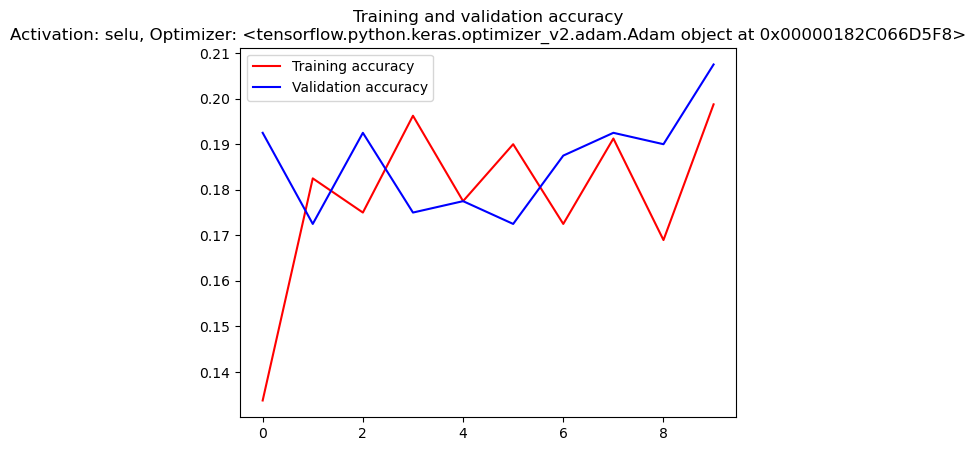

<Figure size 640x480 with 0 Axes>

Activation: selu, Optimizer: Adam, Test Accuracy: 0.18415524065494537
Epoch 1/10
40/40 - 6s - loss: 8.7611 - accuracy: 0.1488 - val_loss: 4.0872 - val_accuracy: 0.0650
Epoch 2/10
40/40 - 6s - loss: 3.2147 - accuracy: 0.1625 - val_loss: 2.2906 - val_accuracy: 0.1625
Epoch 3/10
40/40 - 6s - loss: 2.8510 - accuracy: 0.1450 - val_loss: 2.2689 - val_accuracy: 0.2125
Epoch 4/10
40/40 - 6s - loss: 2.5245 - accuracy: 0.1625 - val_loss: 2.2284 - val_accuracy: 0.1350
Epoch 5/10
40/40 - 6s - loss: 2.3004 - accuracy: 0.1713 - val_loss: 2.3034 - val_accuracy: 0.1750
Epoch 6/10
40/40 - 6s - loss: 2.3855 - accuracy: 0.1513 - val_loss: 2.6385 - val_accuracy: 0.1025
Epoch 7/10
40/40 - 6s - loss: 2.2877 - accuracy: 0.1675 - val_loss: 2.2587 - val_accuracy: 0.1975
Epoch 8/10
40/40 - 6s - loss: 2.5805 - accuracy: 0.1637 - val_loss: 2.2556 - val_accuracy: 0.1500
Epoch 9/10
40/40 - 6s - loss: 2.2784 - accuracy: 0.1787 - val_loss: 2.2814 - val_accuracy: 0.1725
Epoch 10/10
40/40 - 6s - loss: 2.3093 - accuracy

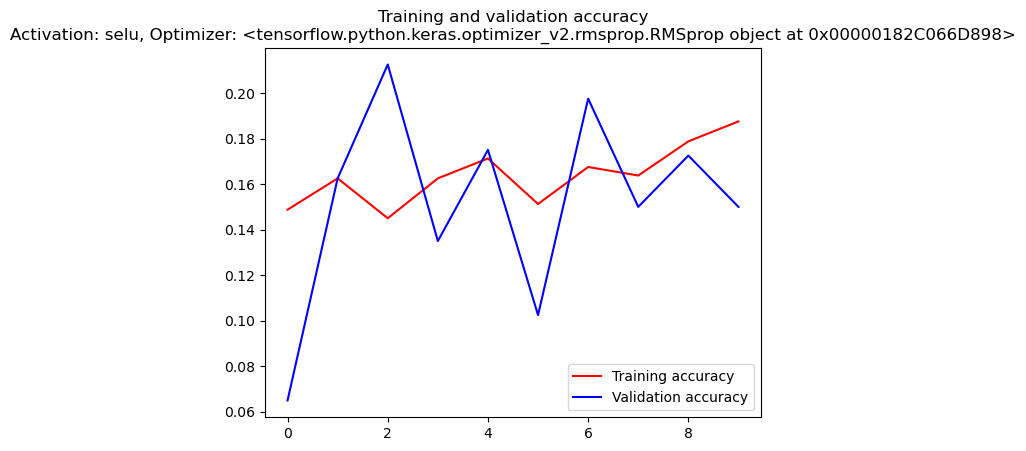

<Figure size 640x480 with 0 Axes>

Activation: selu, Optimizer: RMSprop, Test Accuracy: 0.1841934323310852
Activation: relu, Optimizer: SGD, Test Accuracy: 0.23228542506694794
Activation: relu, Optimizer: Adam, Test Accuracy: 0.2877497375011444
Activation: relu, Optimizer: RMSprop, Test Accuracy: 0.3440161943435669
Activation: elu, Optimizer: SGD, Test Accuracy: 0.27208831906318665
Activation: elu, Optimizer: Adam, Test Accuracy: 0.2575346529483795
Activation: elu, Optimizer: RMSprop, Test Accuracy: 0.23499751091003418
Activation: selu, Optimizer: SGD, Test Accuracy: 0.18575957417488098
Activation: selu, Optimizer: Adam, Test Accuracy: 0.18415524065494537
Activation: selu, Optimizer: RMSprop, Test Accuracy: 0.1841934323310852


In [ ]:
# We test all the activation functions with the different optimization methods

# This is a dictionary to store the results and compare it later
results = {}

# We run a nested loop to build and test the model for each possible combination.
# It will go through both lists: activation and optimizer.
for activation in activation_functions:
    for optimizer in optimizers:
        
        # We build the model with the given activation function
        model = build_cnn_model(activation)
        
        # We compile the model with the given optimizer
        model.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])
        
        # Train the model
        history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 40,
            epochs = 10,
            validation_steps = 20,
            verbose = 2)
        
        # Evaluate the model
        test_loss, test_acc = model.evaluate(validation_generator, verbose=2)
        
        # Plot training and validation accuracy
        acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']
        epochs = range(len(acc))
    
        plt.plot(epochs, acc, 'r', label='Training accuracy')
        plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
        plt.title(f'Training and validation accuracy\nActivation: {activation}, Optimizer: {optimizer}')
        plt.legend(loc=0)
        plt.figure()
        plt.show()
        
        # Store the results
        opt_name = type(optimizer).__name__
        results[(activation, opt_name)] = {'test_loss': test_loss, 'test_acc': test_acc}

        print(f"Activation: {activation}, Optimizer: {opt_name}, Test Accuracy: {test_acc}")

# Print the final results
for key, value in results.items():
    print(f"Activation: {key[0]}, Optimizer: {key[1]}, Test Accuracy: {value['test_acc']}")      

Epoch 1/10
40/40 - 8s - loss: 2.2252 - accuracy: 0.1937 - val_loss: 2.2618 - val_accuracy: 0.1675
Epoch 2/10
40/40 - 8s - loss: 2.2521 - accuracy: 0.1400 - val_loss: 2.2128 - val_accuracy: 0.2025
Epoch 3/10
40/40 - 8s - loss: 2.1964 - accuracy: 0.2050 - val_loss: 2.1939 - val_accuracy: 0.1650
Epoch 4/10
40/40 - 8s - loss: 2.2182 - accuracy: 0.1700 - val_loss: 2.2315 - val_accuracy: 0.1950
Epoch 5/10
40/40 - 8s - loss: 2.1807 - accuracy: 0.2025 - val_loss: 2.2055 - val_accuracy: 0.1975
Epoch 6/10
40/40 - 8s - loss: 2.2015 - accuracy: 0.1950 - val_loss: 2.1606 - val_accuracy: 0.2275
Epoch 7/10
40/40 - 8s - loss: 2.2067 - accuracy: 0.1950 - val_loss: 2.2228 - val_accuracy: 0.1575
Epoch 8/10
40/40 - 8s - loss: 2.1861 - accuracy: 0.1988 - val_loss: 2.1648 - val_accuracy: 0.2375
Epoch 9/10
40/40 - 8s - loss: 2.1910 - accuracy: 0.1900 - val_loss: 2.1756 - val_accuracy: 0.2300
Epoch 10/10
40/40 - 8s - loss: 2.1733 - accuracy: 0.2125 - val_loss: 2.1731 - val_accuracy: 0.1725
1309/1309 - 137s - 

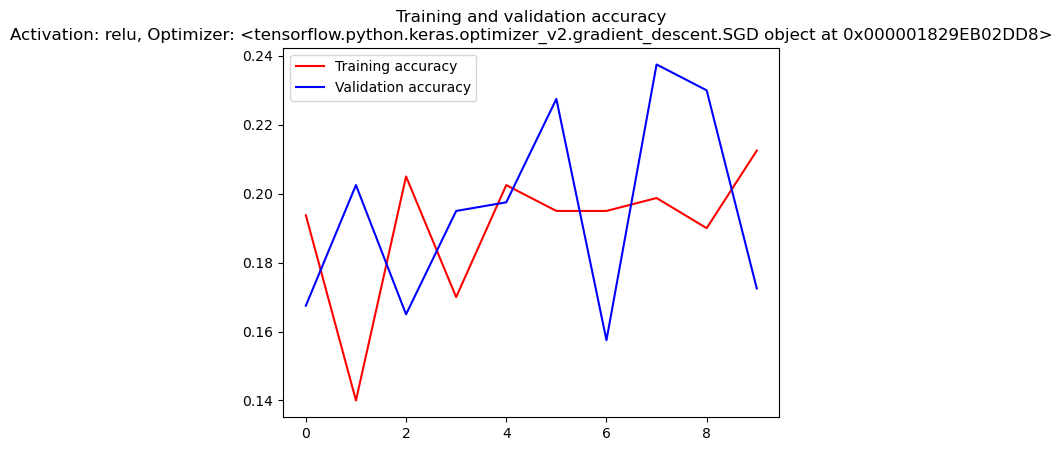

<Figure size 640x480 with 0 Axes>

Activation: relu, Optimizer: SGD, Learning Rate: 0.009999999776482582, Test Accuracy: 0.18266549706459045
Epoch 1/10
40/40 - 8s - loss: 2.3107 - accuracy: 0.0825 - val_loss: 2.2880 - val_accuracy: 0.1175
Epoch 2/10
40/40 - 8s - loss: 2.2766 - accuracy: 0.1700 - val_loss: 2.2663 - val_accuracy: 0.2125
Epoch 3/10
40/40 - 8s - loss: 2.2549 - accuracy: 0.2125 - val_loss: 2.2450 - val_accuracy: 0.1850
Epoch 4/10
40/40 - 8s - loss: 2.2606 - accuracy: 0.1750 - val_loss: 2.2347 - val_accuracy: 0.1875
Epoch 5/10
40/40 - 8s - loss: 2.2470 - accuracy: 0.1925 - val_loss: 2.2287 - val_accuracy: 0.2200
Epoch 6/10
40/40 - 8s - loss: 2.2286 - accuracy: 0.2025 - val_loss: 2.1921 - val_accuracy: 0.2150
Epoch 7/10
40/40 - 8s - loss: 2.2005 - accuracy: 0.2037 - val_loss: 2.2057 - val_accuracy: 0.1925
Epoch 8/10
40/40 - 8s - loss: 2.2444 - accuracy: 0.1813 - val_loss: 2.2093 - val_accuracy: 0.1825
Epoch 9/10
40/40 - 8s - loss: 2.2029 - accuracy: 0.2175 - val_loss: 2.2211 - val_accuracy: 0.1750
Epoch 10/10


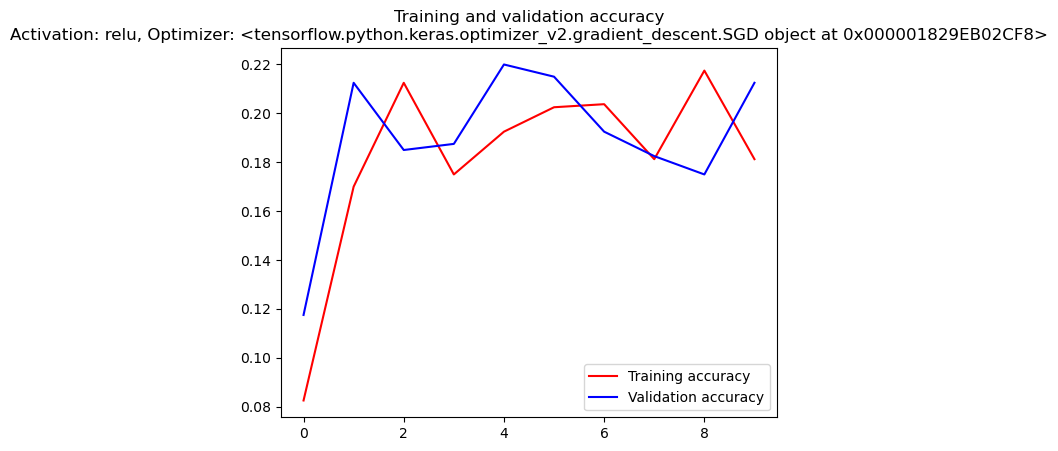

<Figure size 640x480 with 0 Axes>

Activation: relu, Optimizer: SGD, Learning Rate: 0.0010000000474974513, Test Accuracy: 0.20657779276371002
Epoch 1/10
40/40 - 13s - loss: 2.2496 - accuracy: 0.1887 - val_loss: 2.1921 - val_accuracy: 0.2025
Epoch 2/10
40/40 - 13s - loss: 2.2381 - accuracy: 0.1737 - val_loss: 2.2250 - val_accuracy: 0.1700
Epoch 3/10
40/40 - 14s - loss: 2.2107 - accuracy: 0.1850 - val_loss: 2.2078 - val_accuracy: 0.2100
Epoch 4/10
40/40 - 14s - loss: 2.1759 - accuracy: 0.1912 - val_loss: 2.1502 - val_accuracy: 0.2425
Epoch 5/10
40/40 - 13s - loss: 2.1273 - accuracy: 0.2237 - val_loss: 2.0918 - val_accuracy: 0.2275
Epoch 6/10
40/40 - 12s - loss: 2.0505 - accuracy: 0.2612 - val_loss: 2.0136 - val_accuracy: 0.2550
Epoch 7/10
40/40 - 11s - loss: 2.0663 - accuracy: 0.2650 - val_loss: 1.8956 - val_accuracy: 0.3150
Epoch 8/10
40/40 - 10s - loss: 1.9704 - accuracy: 0.2825 - val_loss: 1.9627 - val_accuracy: 0.2925
Epoch 9/10
40/40 - 10s - loss: 1.9818 - accuracy: 0.3063 - val_loss: 2.0136 - val_accuracy: 0.2750
Ep

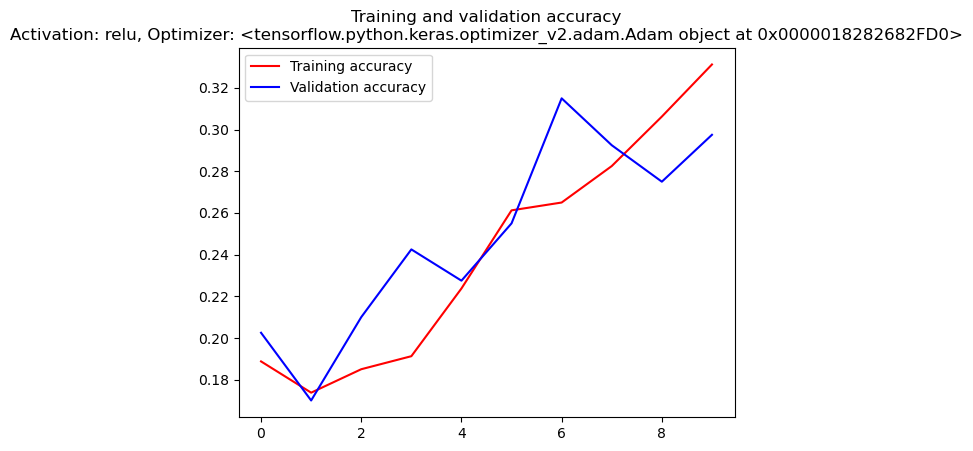

<Figure size 640x480 with 0 Axes>

Activation: relu, Optimizer: Adam, Learning Rate: 0.0010000000474974513, Test Accuracy: 0.29806333780288696
Epoch 1/10
40/40 - 10s - loss: 2.2281 - accuracy: 0.1875 - val_loss: 2.1818 - val_accuracy: 0.1950
Epoch 2/10
40/40 - 11s - loss: 2.1802 - accuracy: 0.2037 - val_loss: 2.1832 - val_accuracy: 0.1850
Epoch 3/10
40/40 - 11s - loss: 2.1899 - accuracy: 0.2125 - val_loss: 2.1066 - val_accuracy: 0.2400
Epoch 4/10
40/40 - 13s - loss: 2.1414 - accuracy: 0.2075 - val_loss: 2.0897 - val_accuracy: 0.2550
Epoch 5/10
40/40 - 14s - loss: 2.0672 - accuracy: 0.2550 - val_loss: 2.0573 - val_accuracy: 0.2825
Epoch 6/10
40/40 - 14s - loss: 2.0743 - accuracy: 0.2612 - val_loss: 2.0647 - val_accuracy: 0.2475
Epoch 7/10
40/40 - 13s - loss: 1.9539 - accuracy: 0.2975 - val_loss: 2.0229 - val_accuracy: 0.2750
Epoch 8/10
40/40 - 13s - loss: 1.9744 - accuracy: 0.2862 - val_loss: 1.9810 - val_accuracy: 0.2900
Epoch 9/10
40/40 - 10s - loss: 1.9497 - accuracy: 0.3175 - val_loss: 1.9505 - val_accuracy: 0.3150
E

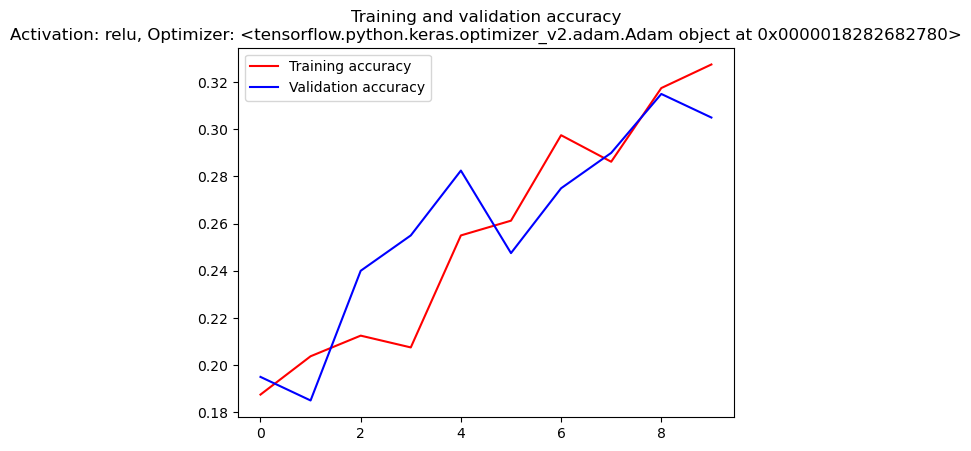

<Figure size 640x480 with 0 Axes>

Activation: relu, Optimizer: Adam, Learning Rate: 9.999999747378752e-05, Test Accuracy: 0.31361013650894165
Epoch 1/10
40/40 - 11s - loss: 2.3260 - accuracy: 0.1925 - val_loss: 2.2059 - val_accuracy: 0.2050
Epoch 2/10
40/40 - 11s - loss: 2.1886 - accuracy: 0.1750 - val_loss: 2.1839 - val_accuracy: 0.1825
Epoch 3/10
40/40 - 12s - loss: 2.1952 - accuracy: 0.2212 - val_loss: 2.0912 - val_accuracy: 0.2425
Epoch 4/10
40/40 - 15s - loss: 2.1372 - accuracy: 0.2412 - val_loss: 2.0909 - val_accuracy: 0.2350
Epoch 5/10
40/40 - 15s - loss: 2.1106 - accuracy: 0.2700 - val_loss: 2.0639 - val_accuracy: 0.3200
Epoch 6/10
40/40 - 15s - loss: 2.0683 - accuracy: 0.2688 - val_loss: 1.9586 - val_accuracy: 0.3050
Epoch 7/10
40/40 - 15s - loss: 2.0065 - accuracy: 0.2916 - val_loss: 1.9499 - val_accuracy: 0.3100
Epoch 8/10
40/40 - 13s - loss: 1.9934 - accuracy: 0.2850 - val_loss: 1.9926 - val_accuracy: 0.3000
Epoch 9/10
40/40 - 11s - loss: 1.9522 - accuracy: 0.3288 - val_loss: 1.7947 - val_accuracy: 0.3475
E

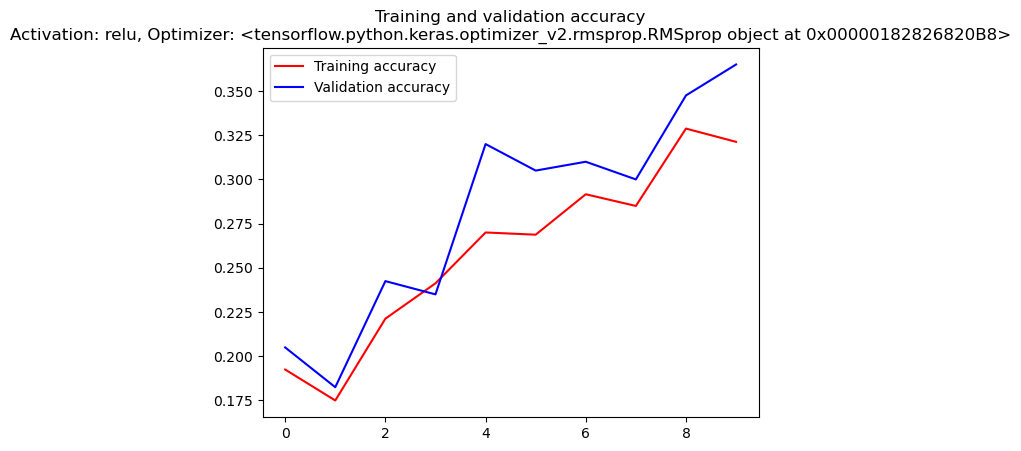

<Figure size 640x480 with 0 Axes>

Activation: relu, Optimizer: RMSprop, Learning Rate: 0.0010000000474974513, Test Accuracy: 0.365751177072525
Epoch 1/10
40/40 - 11s - loss: 2.2232 - accuracy: 0.1713 - val_loss: 2.1946 - val_accuracy: 0.2125
Epoch 2/10
40/40 - 10s - loss: 2.2055 - accuracy: 0.1912 - val_loss: 2.2127 - val_accuracy: 0.1975
Epoch 3/10
40/40 - 10s - loss: 2.2106 - accuracy: 0.1787 - val_loss: 2.2219 - val_accuracy: 0.1525
Epoch 4/10
40/40 - 11s - loss: 2.1474 - accuracy: 0.2240 - val_loss: 2.1981 - val_accuracy: 0.1825
Epoch 5/10
40/40 - 13s - loss: 2.1000 - accuracy: 0.2475 - val_loss: 2.0835 - val_accuracy: 0.2875
Epoch 6/10
40/40 - 15s - loss: 2.0924 - accuracy: 0.2400 - val_loss: 2.0641 - val_accuracy: 0.3125
Epoch 7/10
40/40 - 14s - loss: 2.0487 - accuracy: 0.2663 - val_loss: 2.0023 - val_accuracy: 0.3250
Epoch 8/10
40/40 - 12s - loss: 2.0344 - accuracy: 0.2750 - val_loss: 1.9946 - val_accuracy: 0.2875
Epoch 9/10
40/40 - 13s - loss: 2.0034 - accuracy: 0.2900 - val_loss: 1.9866 - val_accuracy: 0.3150


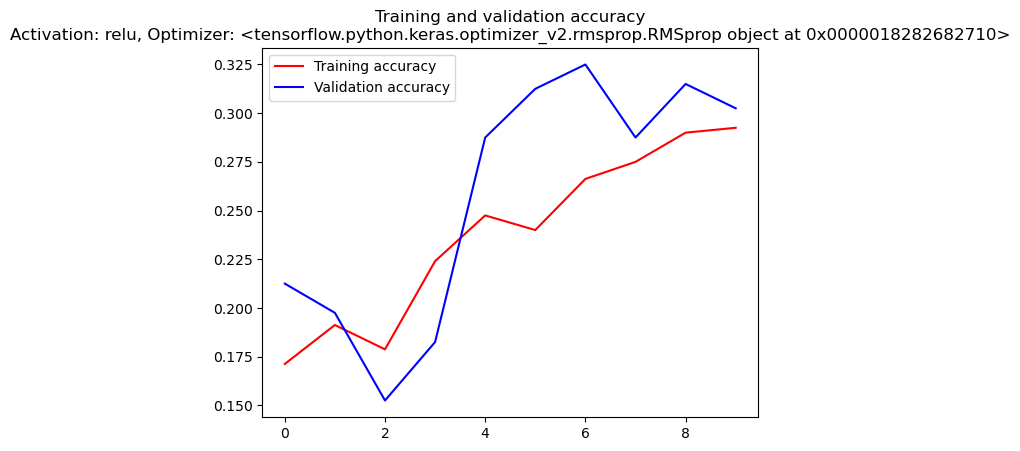

<Figure size 640x480 with 0 Axes>

Activation: relu, Optimizer: RMSprop, Learning Rate: 9.999999747378752e-05, Test Accuracy: 0.31697162985801697
Epoch 1/10
40/40 - 7s - loss: 2.2247 - accuracy: 0.1663 - val_loss: 2.1950 - val_accuracy: 0.1675
Epoch 2/10
40/40 - 7s - loss: 2.1999 - accuracy: 0.1825 - val_loss: 2.1381 - val_accuracy: 0.1950
Epoch 3/10
40/40 - 7s - loss: 2.1572 - accuracy: 0.2212 - val_loss: 2.1961 - val_accuracy: 0.2250
Epoch 4/10
40/40 - 8s - loss: 2.1070 - accuracy: 0.2525 - val_loss: 2.0639 - val_accuracy: 0.2925
Epoch 5/10
40/40 - 7s - loss: 2.1209 - accuracy: 0.2412 - val_loss: 2.0389 - val_accuracy: 0.2950
Epoch 6/10
40/40 - 7s - loss: 2.0991 - accuracy: 0.2412 - val_loss: 2.0786 - val_accuracy: 0.2875
Epoch 7/10
40/40 - 7s - loss: 2.0445 - accuracy: 0.2763 - val_loss: 2.0142 - val_accuracy: 0.2975
Epoch 8/10
40/40 - 7s - loss: 2.0407 - accuracy: 0.2800 - val_loss: 2.0265 - val_accuracy: 0.2300
Epoch 9/10
40/40 - 8s - loss: 2.0322 - accuracy: 0.2688 - val_loss: 2.0520 - val_accuracy: 0.2675
Epoch 1

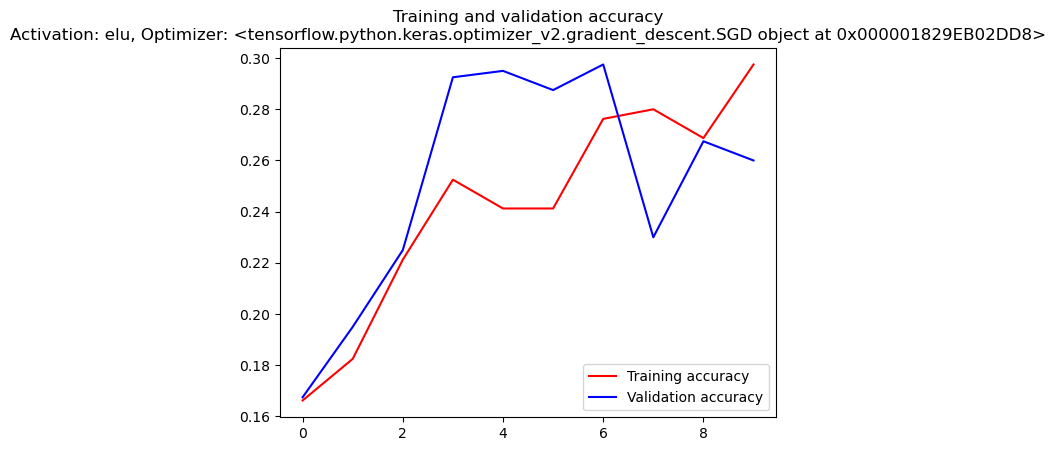

<Figure size 640x480 with 0 Axes>

Activation: elu, Optimizer: SGD, Learning Rate: 0.009999999776482582, Test Accuracy: 0.2772069275379181
Epoch 1/10
40/40 - 9s - loss: 2.2288 - accuracy: 0.1900 - val_loss: 2.1962 - val_accuracy: 0.1975
Epoch 2/10
40/40 - 8s - loss: 2.1900 - accuracy: 0.1902 - val_loss: 2.2358 - val_accuracy: 0.1825
Epoch 3/10
40/40 - 8s - loss: 2.2030 - accuracy: 0.1863 - val_loss: 2.1227 - val_accuracy: 0.2200
Epoch 4/10
40/40 - 9s - loss: 2.2196 - accuracy: 0.1887 - val_loss: 2.2094 - val_accuracy: 0.1775
Epoch 5/10
40/40 - 8s - loss: 2.2035 - accuracy: 0.1850 - val_loss: 2.2001 - val_accuracy: 0.1775
Epoch 6/10
40/40 - 9s - loss: 2.1651 - accuracy: 0.2003 - val_loss: 2.1899 - val_accuracy: 0.2175
Epoch 7/10
40/40 - 8s - loss: 2.1679 - accuracy: 0.2090 - val_loss: 2.2034 - val_accuracy: 0.1875
Epoch 8/10
40/40 - 7s - loss: 2.1781 - accuracy: 0.2025 - val_loss: 2.1730 - val_accuracy: 0.1900
Epoch 9/10
40/40 - 7s - loss: 2.1836 - accuracy: 0.1875 - val_loss: 2.1302 - val_accuracy: 0.2400
Epoch 10/10
40

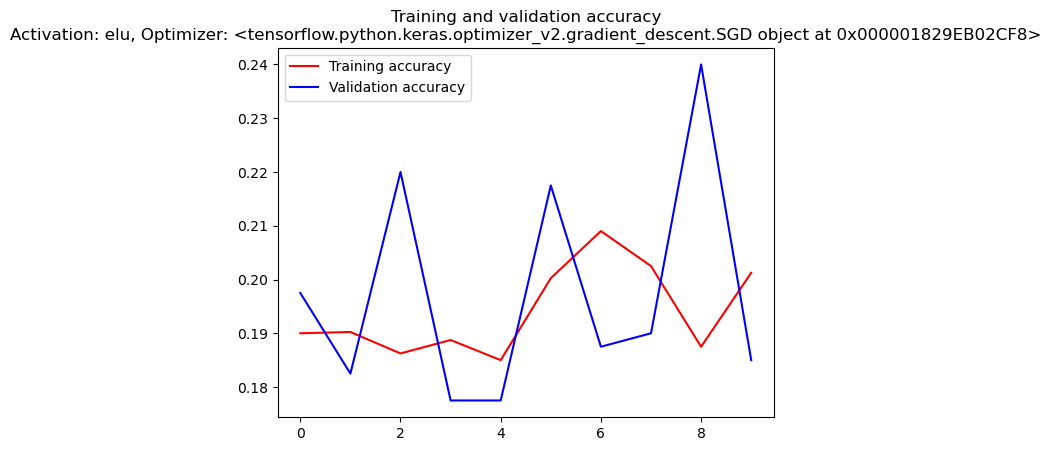

<Figure size 640x480 with 0 Axes>

Activation: elu, Optimizer: SGD, Learning Rate: 0.0010000000474974513, Test Accuracy: 0.19714275002479553
Epoch 1/10
40/40 - 7s - loss: 4.4471 - accuracy: 0.1325 - val_loss: 2.3428 - val_accuracy: 0.1800
Epoch 2/10
40/40 - 7s - loss: 2.2956 - accuracy: 0.1900 - val_loss: 2.3087 - val_accuracy: 0.2000
Epoch 3/10
40/40 - 7s - loss: 2.2244 - accuracy: 0.1787 - val_loss: 2.2771 - val_accuracy: 0.1600
Epoch 4/10
40/40 - 7s - loss: 2.2163 - accuracy: 0.1850 - val_loss: 2.2465 - val_accuracy: 0.1875
Epoch 5/10
40/40 - 7s - loss: 2.2928 - accuracy: 0.1675 - val_loss: 3.0932 - val_accuracy: 0.1300
Epoch 6/10
40/40 - 7s - loss: 2.3003 - accuracy: 0.1750 - val_loss: 2.2474 - val_accuracy: 0.1925
Epoch 7/10
40/40 - 8s - loss: 2.2070 - accuracy: 0.2013 - val_loss: 2.2059 - val_accuracy: 0.1875
Epoch 8/10
40/40 - 9s - loss: 2.2206 - accuracy: 0.2025 - val_loss: 2.2379 - val_accuracy: 0.1675
Epoch 9/10
40/40 - 9s - loss: 2.2215 - accuracy: 0.2050 - val_loss: 2.2348 - val_accuracy: 0.2300
Epoch 10/10


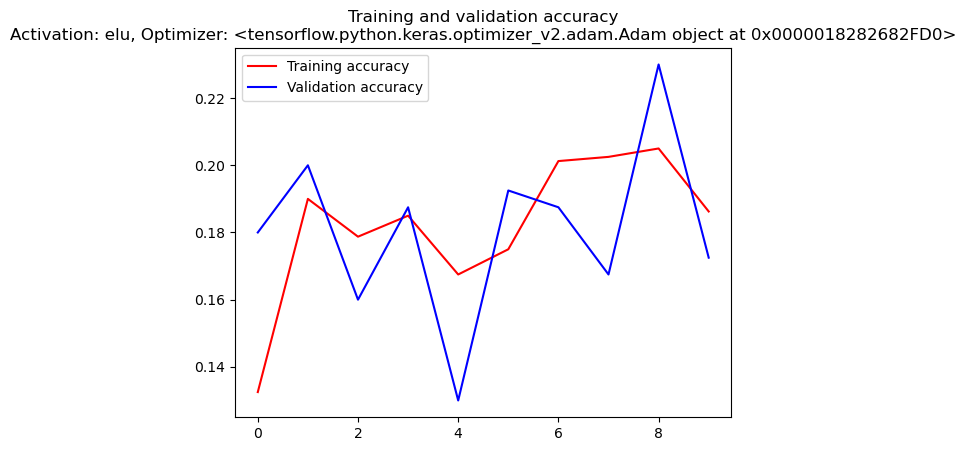

<Figure size 640x480 with 0 Axes>

Activation: elu, Optimizer: Adam, Learning Rate: 0.0010000000474974513, Test Accuracy: 0.18575957417488098
Epoch 1/10
40/40 - 12s - loss: 2.3929 - accuracy: 0.2175 - val_loss: 2.1125 - val_accuracy: 0.2525
Epoch 2/10
40/40 - 9s - loss: 2.1458 - accuracy: 0.2362 - val_loss: 2.0975 - val_accuracy: 0.2300
Epoch 3/10
40/40 - 9s - loss: 2.0258 - accuracy: 0.2700 - val_loss: 2.0007 - val_accuracy: 0.2750
Epoch 4/10
40/40 - 8s - loss: 2.0146 - accuracy: 0.2688 - val_loss: 1.9798 - val_accuracy: 0.2750
Epoch 5/10
40/40 - 8s - loss: 1.9485 - accuracy: 0.3100 - val_loss: 2.0536 - val_accuracy: 0.2800
Epoch 6/10
40/40 - 8s - loss: 1.9797 - accuracy: 0.3050 - val_loss: 1.9090 - val_accuracy: 0.3125
Epoch 7/10
40/40 - 8s - loss: 1.9749 - accuracy: 0.2862 - val_loss: 1.8730 - val_accuracy: 0.3350
Epoch 8/10
40/40 - 8s - loss: 1.8935 - accuracy: 0.3200 - val_loss: 1.9715 - val_accuracy: 0.2900
Epoch 9/10
40/40 - 8s - loss: 1.8911 - accuracy: 0.3063 - val_loss: 1.8978 - val_accuracy: 0.3250
Epoch 10/1

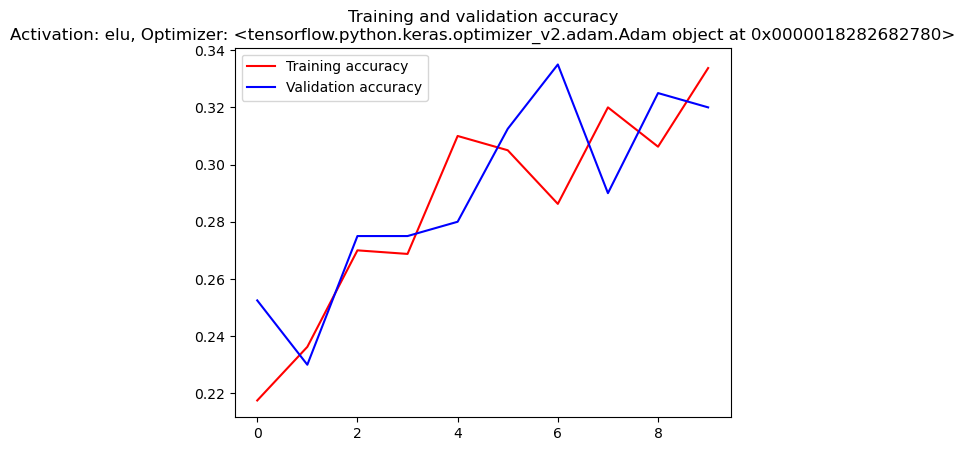

<Figure size 640x480 with 0 Axes>

Activation: elu, Optimizer: Adam, Learning Rate: 9.999999747378752e-05, Test Accuracy: 0.3151762783527374
Epoch 1/10
40/40 - 11s - loss: 4.8673 - accuracy: 0.1425 - val_loss: 2.2908 - val_accuracy: 0.1975
Epoch 2/10
40/40 - 12s - loss: 2.4613 - accuracy: 0.1875 - val_loss: 2.2531 - val_accuracy: 0.1800
Epoch 3/10
40/40 - 14s - loss: 2.5622 - accuracy: 0.1725 - val_loss: 2.1796 - val_accuracy: 0.1825
Epoch 4/10
40/40 - 15s - loss: 2.2511 - accuracy: 0.1887 - val_loss: 2.9424 - val_accuracy: 0.2200
Epoch 5/10
40/40 - 14s - loss: 2.2753 - accuracy: 0.2150 - val_loss: 2.0937 - val_accuracy: 0.2775
Epoch 6/10
40/40 - 11s - loss: 2.1650 - accuracy: 0.2463 - val_loss: 2.1510 - val_accuracy: 0.2175
Epoch 7/10
40/40 - 9s - loss: 2.1322 - accuracy: 0.2575 - val_loss: 2.0333 - val_accuracy: 0.2875
Epoch 8/10
40/40 - 9s - loss: 2.1368 - accuracy: 0.2525 - val_loss: 2.0260 - val_accuracy: 0.2800
Epoch 9/10
40/40 - 8s - loss: 2.0646 - accuracy: 0.2825 - val_loss: 1.9370 - val_accuracy: 0.3525
Epoch 

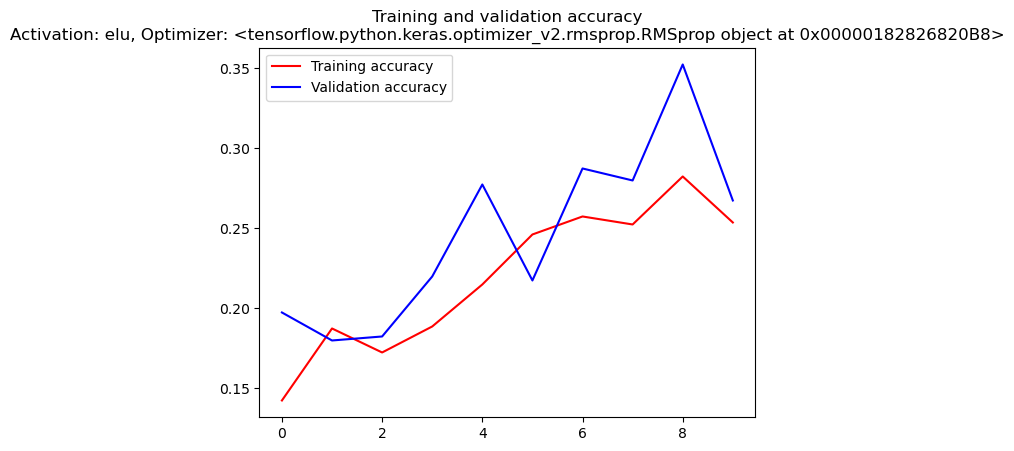

<Figure size 640x480 with 0 Axes>

Activation: elu, Optimizer: RMSprop, Learning Rate: 0.0010000000474974513, Test Accuracy: 0.2957332134246826
Epoch 1/10
40/40 - 8s - loss: 2.4334 - accuracy: 0.1775 - val_loss: 2.1794 - val_accuracy: 0.1600
Epoch 2/10
40/40 - 7s - loss: 2.0973 - accuracy: 0.2163 - val_loss: 2.0576 - val_accuracy: 0.2150
Epoch 3/10
40/40 - 7s - loss: 2.0993 - accuracy: 0.2450 - val_loss: 2.0525 - val_accuracy: 0.2875
Epoch 4/10
40/40 - 8s - loss: 2.0346 - accuracy: 0.2763 - val_loss: 1.9461 - val_accuracy: 0.3325
Epoch 5/10
40/40 - 8s - loss: 2.0488 - accuracy: 0.2537 - val_loss: 2.0071 - val_accuracy: 0.2475
Epoch 6/10
40/40 - 8s - loss: 1.9924 - accuracy: 0.2825 - val_loss: 1.9706 - val_accuracy: 0.2975
Epoch 7/10
40/40 - 7s - loss: 2.0045 - accuracy: 0.2500 - val_loss: 1.9591 - val_accuracy: 0.2725
Epoch 8/10
40/40 - 8s - loss: 1.9345 - accuracy: 0.3050 - val_loss: 1.8839 - val_accuracy: 0.3575
Epoch 9/10
40/40 - 10s - loss: 1.9653 - accuracy: 0.3088 - val_loss: 1.9484 - val_accuracy: 0.3075
Epoch 10

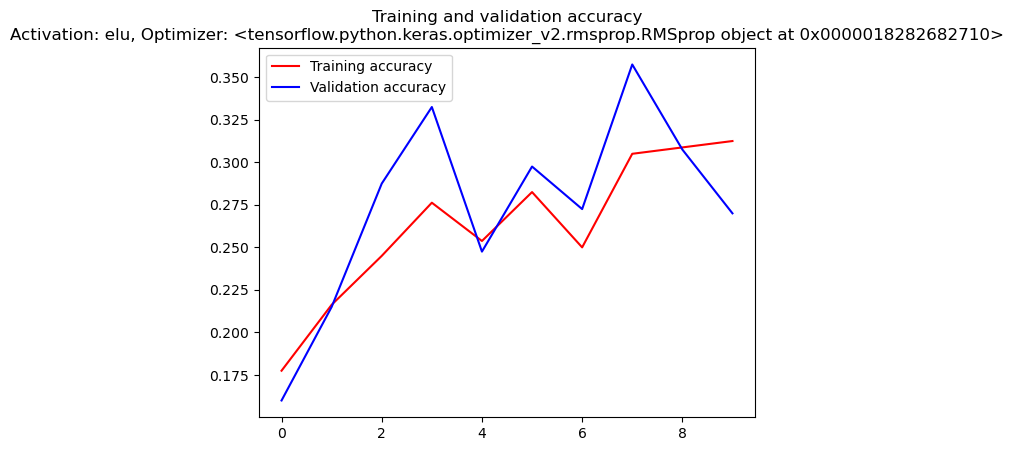

<Figure size 640x480 with 0 Axes>

Activation: elu, Optimizer: RMSprop, Learning Rate: 9.999999747378752e-05, Test Accuracy: 0.28675657510757446
Epoch 1/10
40/40 - 10s - loss: nan - accuracy: 0.1587 - val_loss: nan - val_accuracy: 0.1800
Epoch 2/10
40/40 - 10s - loss: nan - accuracy: 0.1825 - val_loss: nan - val_accuracy: 0.2000
Epoch 3/10
40/40 - 10s - loss: nan - accuracy: 0.1775 - val_loss: nan - val_accuracy: 0.2000
Epoch 4/10
40/40 - 7s - loss: nan - accuracy: 0.1937 - val_loss: nan - val_accuracy: 0.1750
Epoch 5/10
40/40 - 7s - loss: nan - accuracy: 0.1800 - val_loss: nan - val_accuracy: 0.1925
Epoch 6/10
40/40 - 7s - loss: nan - accuracy: 0.1813 - val_loss: nan - val_accuracy: 0.2300
Epoch 7/10
40/40 - 8s - loss: nan - accuracy: 0.1663 - val_loss: nan - val_accuracy: 0.1975
Epoch 8/10
40/40 - 7s - loss: nan - accuracy: 0.1840 - val_loss: nan - val_accuracy: 0.1875
Epoch 9/10
40/40 - 7s - loss: nan - accuracy: 0.1750 - val_loss: nan - val_accuracy: 0.1975
Epoch 10/10
40/40 - 8s - loss: nan - accuracy: 0.1863 - val

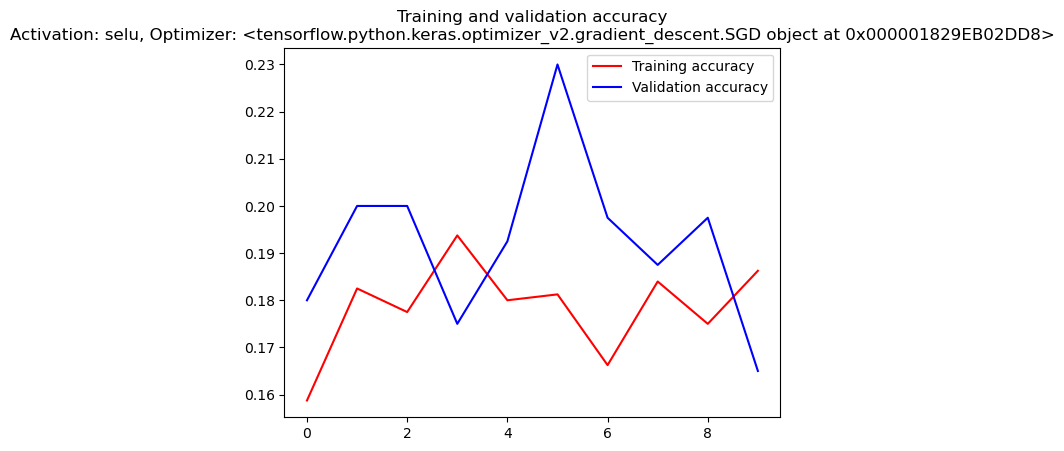

<Figure size 640x480 with 0 Axes>

Activation: selu, Optimizer: SGD, Learning Rate: 0.009999999776482582, Test Accuracy: 0.18575957417488098
Epoch 1/10
40/40 - 6s - loss: 2.3389 - accuracy: 0.1725 - val_loss: 2.2734 - val_accuracy: 0.1375
Epoch 2/10
40/40 - 6s - loss: 2.2487 - accuracy: 0.1863 - val_loss: 2.3167 - val_accuracy: 0.1550
Epoch 3/10
40/40 - 6s - loss: 2.2195 - accuracy: 0.1912 - val_loss: 2.2642 - val_accuracy: 0.1650
Epoch 4/10
40/40 - 6s - loss: 2.1853 - accuracy: 0.1875 - val_loss: 2.1521 - val_accuracy: 0.2125
Epoch 5/10
40/40 - 6s - loss: 2.1641 - accuracy: 0.2100 - val_loss: 2.1522 - val_accuracy: 0.2300
Epoch 6/10
40/40 - 6s - loss: 2.1607 - accuracy: 0.2250 - val_loss: 2.1645 - val_accuracy: 0.1875
Epoch 7/10
40/40 - 6s - loss: 2.1245 - accuracy: 0.2400 - val_loss: 2.1028 - val_accuracy: 0.2175
Epoch 8/10
40/40 - 6s - loss: 2.1101 - accuracy: 0.2425 - val_loss: 2.2368 - val_accuracy: 0.1800
Epoch 9/10
40/40 - 6s - loss: 2.1136 - accuracy: 0.2550 - val_loss: 2.1205 - val_accuracy: 0.2400
Epoch 10/10


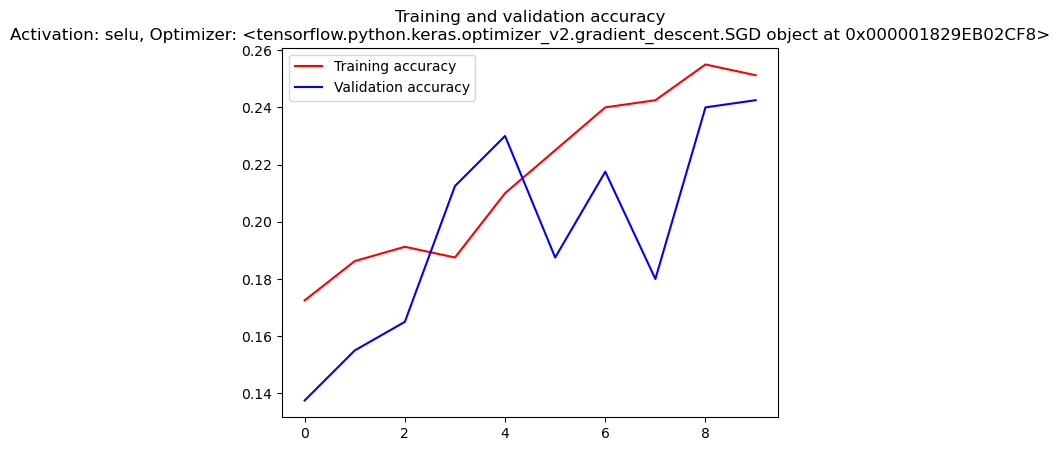

<Figure size 640x480 with 0 Axes>

Activation: selu, Optimizer: SGD, Learning Rate: 0.0010000000474974513, Test Accuracy: 0.25997936725616455
Epoch 1/10
40/40 - 6s - loss: 24.3302 - accuracy: 0.1150 - val_loss: 2.9910 - val_accuracy: 0.0775
Epoch 2/10
40/40 - 6s - loss: 2.5571 - accuracy: 0.1312 - val_loss: 2.5475 - val_accuracy: 0.1000
Epoch 3/10
40/40 - 6s - loss: 2.2643 - accuracy: 0.1637 - val_loss: 2.2709 - val_accuracy: 0.1500
Epoch 4/10
40/40 - 6s - loss: 2.2343 - accuracy: 0.1825 - val_loss: 2.2780 - val_accuracy: 0.1750
Epoch 5/10
40/40 - 6s - loss: 2.2161 - accuracy: 0.1713 - val_loss: 2.1977 - val_accuracy: 0.1775
Epoch 6/10
40/40 - 6s - loss: 2.2121 - accuracy: 0.1975 - val_loss: 2.2314 - val_accuracy: 0.1575
Epoch 7/10
40/40 - 6s - loss: 2.2159 - accuracy: 0.1688 - val_loss: 2.2083 - val_accuracy: 0.2150
Epoch 8/10
40/40 - 6s - loss: 2.2188 - accuracy: 0.1937 - val_loss: 2.1768 - val_accuracy: 0.2150
Epoch 9/10
40/40 - 6s - loss: 2.2056 - accuracy: 0.1838 - val_loss: 2.1961 - val_accuracy: 0.1850
Epoch 10/1

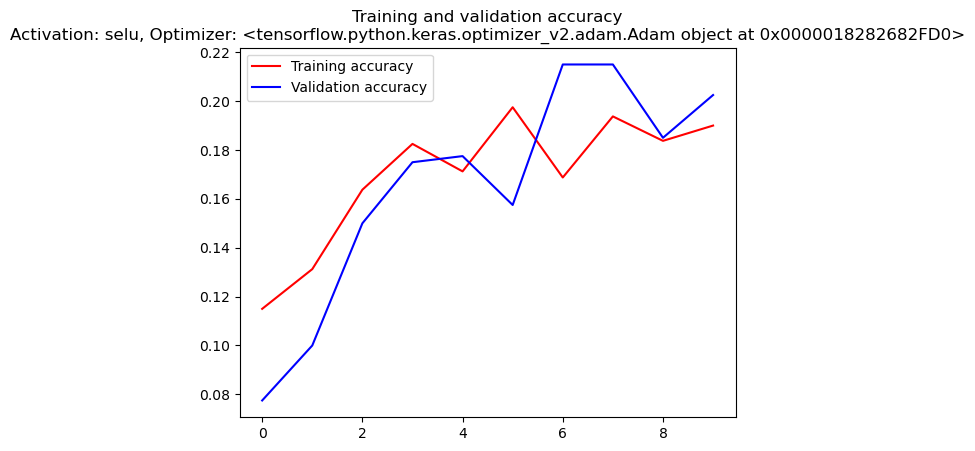

<Figure size 640x480 with 0 Axes>

Activation: selu, Optimizer: Adam, Learning Rate: 0.0010000000474974513, Test Accuracy: 0.18969403207302094
Epoch 1/10
40/40 - 6s - loss: 3.0763 - accuracy: 0.1925 - val_loss: 2.3162 - val_accuracy: 0.2350
Epoch 2/10
40/40 - 6s - loss: 2.2326 - accuracy: 0.2087 - val_loss: 2.0998 - val_accuracy: 0.2450
Epoch 3/10
40/40 - 6s - loss: 2.0425 - accuracy: 0.2488 - val_loss: 1.9802 - val_accuracy: 0.3150
Epoch 4/10
40/40 - 6s - loss: 2.0544 - accuracy: 0.2800 - val_loss: 1.9845 - val_accuracy: 0.2925
Epoch 5/10
40/40 - 6s - loss: 2.0730 - accuracy: 0.2663 - val_loss: 2.0211 - val_accuracy: 0.2775
Epoch 6/10
40/40 - 6s - loss: 1.9993 - accuracy: 0.2837 - val_loss: 1.9559 - val_accuracy: 0.3150
Epoch 7/10
40/40 - 6s - loss: 1.9355 - accuracy: 0.3000 - val_loss: 1.9611 - val_accuracy: 0.3200
Epoch 8/10
40/40 - 6s - loss: 1.9976 - accuracy: 0.2812 - val_loss: 1.8395 - val_accuracy: 0.3775
Epoch 9/10
40/40 - 6s - loss: 2.0076 - accuracy: 0.2725 - val_loss: 1.9666 - val_accuracy: 0.3150
Epoch 10/1

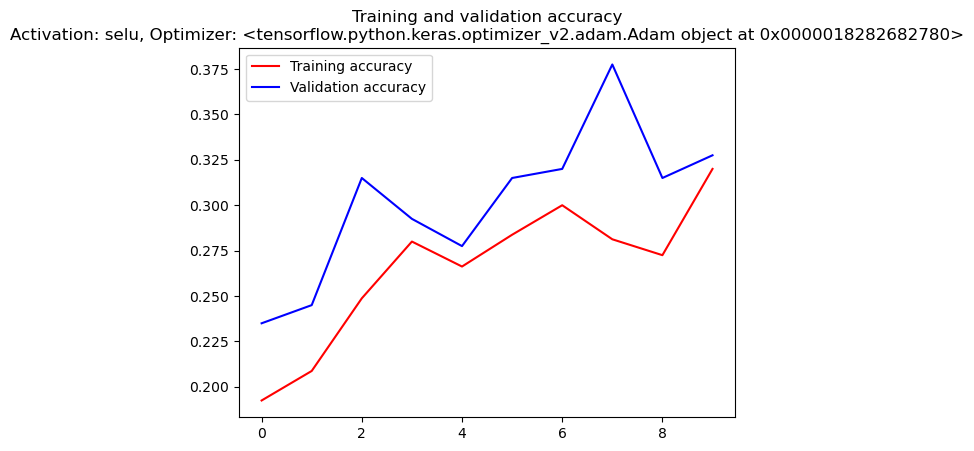

<Figure size 640x480 with 0 Axes>

Activation: selu, Optimizer: Adam, Learning Rate: 9.999999747378752e-05, Test Accuracy: 0.3236945569515228
Epoch 1/10
40/40 - 6s - loss: 8.6573 - accuracy: 0.1287 - val_loss: 2.5480 - val_accuracy: 0.2000
Epoch 2/10
40/40 - 6s - loss: 2.8248 - accuracy: 0.1612 - val_loss: 4.8399 - val_accuracy: 0.1100
Epoch 3/10
40/40 - 6s - loss: 2.5609 - accuracy: 0.1450 - val_loss: 2.5118 - val_accuracy: 0.1850
Epoch 4/10
40/40 - 6s - loss: 2.5606 - accuracy: 0.1750 - val_loss: 2.4859 - val_accuracy: 0.1850
Epoch 5/10
40/40 - 6s - loss: 2.3400 - accuracy: 0.1800 - val_loss: 2.4622 - val_accuracy: 0.1950
Epoch 6/10
40/40 - 6s - loss: 2.7359 - accuracy: 0.1600 - val_loss: 2.2000 - val_accuracy: 0.2275
Epoch 7/10
40/40 - 6s - loss: 2.2970 - accuracy: 0.1713 - val_loss: 2.5031 - val_accuracy: 0.1150
Epoch 8/10
40/40 - 6s - loss: 2.5518 - accuracy: 0.2037 - val_loss: 2.4060 - val_accuracy: 0.2000
Epoch 9/10
40/40 - 6s - loss: 2.2300 - accuracy: 0.2113 - val_loss: 2.2351 - val_accuracy: 0.1850
Epoch 10/10

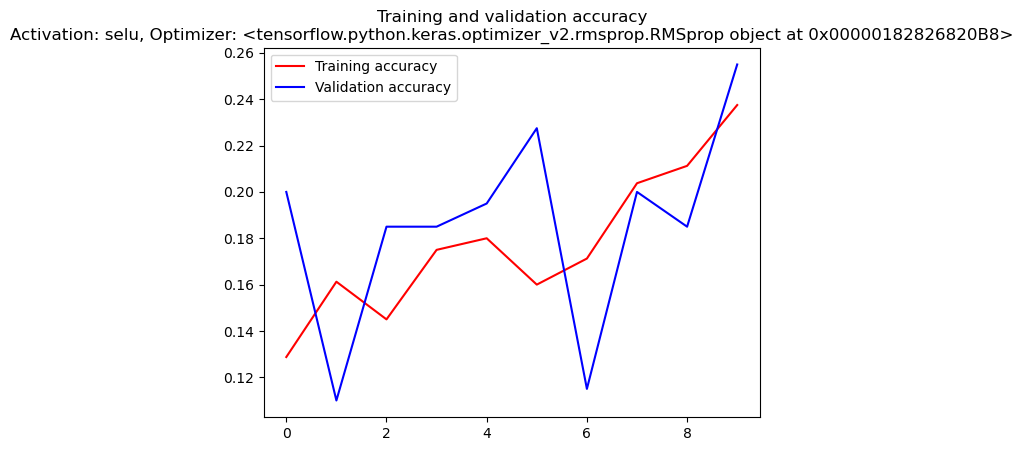

<Figure size 640x480 with 0 Axes>

Activation: selu, Optimizer: RMSprop, Learning Rate: 0.0010000000474974513, Test Accuracy: 0.24485275149345398
Epoch 1/10
40/40 - 6s - loss: 3.4838 - accuracy: 0.1750 - val_loss: 2.2779 - val_accuracy: 0.1625
Epoch 2/10
40/40 - 6s - loss: 2.2863 - accuracy: 0.2125 - val_loss: 2.1935 - val_accuracy: 0.2425
Epoch 3/10
40/40 - 6s - loss: 2.1882 - accuracy: 0.2212 - val_loss: 2.0948 - val_accuracy: 0.2475
Epoch 4/10
40/40 - 6s - loss: 2.0693 - accuracy: 0.2612 - val_loss: 2.2766 - val_accuracy: 0.2275
Epoch 5/10
40/40 - 6s - loss: 2.0197 - accuracy: 0.2850 - val_loss: 2.0652 - val_accuracy: 0.2675
Epoch 6/10
40/40 - 6s - loss: 2.0649 - accuracy: 0.2800 - val_loss: 2.0204 - val_accuracy: 0.3000
Epoch 7/10
40/40 - 6s - loss: 2.0413 - accuracy: 0.2800 - val_loss: 2.0040 - val_accuracy: 0.2850
Epoch 8/10
40/40 - 6s - loss: 2.0259 - accuracy: 0.2837 - val_loss: 1.8921 - val_accuracy: 0.3700
Epoch 9/10
40/40 - 6s - loss: 1.9667 - accuracy: 0.2962 - val_loss: 1.9890 - val_accuracy: 0.2775
Epoch 1

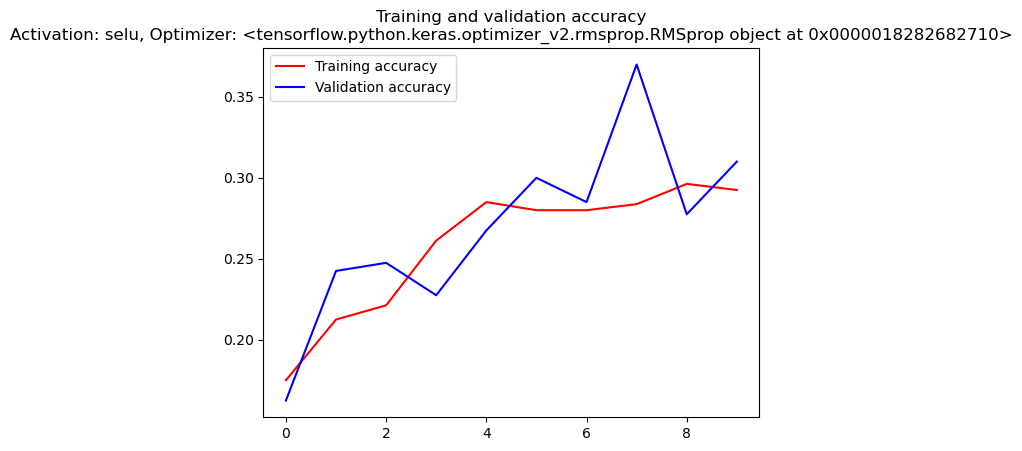

<Figure size 640x480 with 0 Axes>

Activation: selu, Optimizer: RMSprop, Learning Rate: 9.999999747378752e-05, Test Accuracy: 0.30723097920417786
Epoch 1/10
40/40 - 8s - loss: 2.2434 - accuracy: 0.1612 - val_loss: 2.2371 - val_accuracy: 0.1625
Epoch 2/10
40/40 - 8s - loss: 2.2055 - accuracy: 0.2013 - val_loss: 2.1958 - val_accuracy: 0.1775
Epoch 3/10
40/40 - 8s - loss: 2.2141 - accuracy: 0.1775 - val_loss: 2.2206 - val_accuracy: 0.1500
Epoch 4/10
40/40 - 8s - loss: 2.1913 - accuracy: 0.1963 - val_loss: 2.2081 - val_accuracy: 0.2125
Epoch 5/10
40/40 - 8s - loss: 2.2139 - accuracy: 0.1863 - val_loss: 2.2059 - val_accuracy: 0.1900
Epoch 6/10
40/40 - 8s - loss: 2.2139 - accuracy: 0.1850 - val_loss: 2.1788 - val_accuracy: 0.1950
Epoch 7/10
40/40 - 8s - loss: 2.1960 - accuracy: 0.1912 - val_loss: 2.1904 - val_accuracy: 0.2075
Epoch 8/10
40/40 - 8s - loss: 2.1918 - accuracy: 0.2075 - val_loss: 2.2211 - val_accuracy: 0.1775
Epoch 9/10
40/40 - 8s - loss: 2.2202 - accuracy: 0.1838 - val_loss: 2.1735 - val_accuracy: 0.2200
Epoch 1

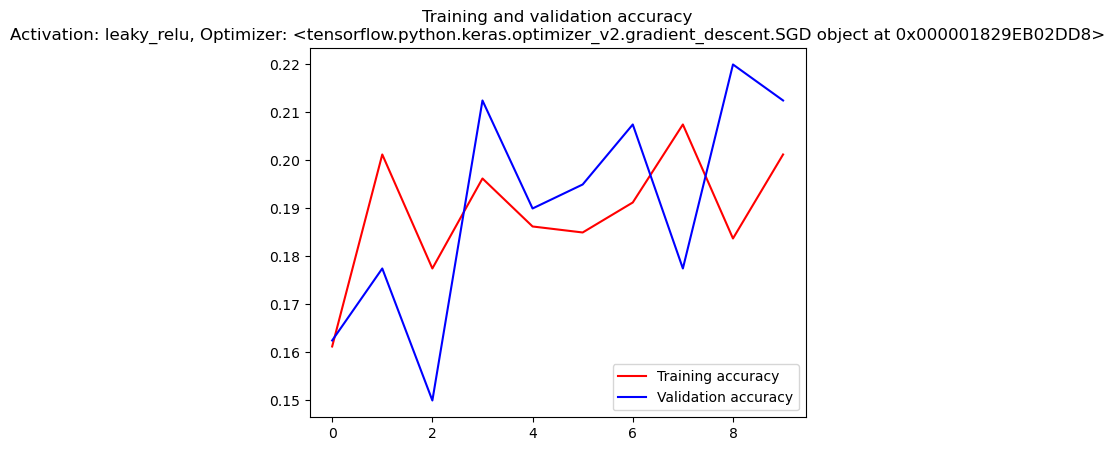

<Figure size 640x480 with 0 Axes>

Activation: leaky_relu, Optimizer: SGD, Learning Rate: 0.009999999776482582, Test Accuracy: 0.18705832958221436
Epoch 1/10
40/40 - 9s - loss: 2.3174 - accuracy: 0.0700 - val_loss: 2.3024 - val_accuracy: 0.0975
Epoch 2/10
40/40 - 8s - loss: 2.2998 - accuracy: 0.1575 - val_loss: 2.2926 - val_accuracy: 0.1700
Epoch 3/10
40/40 - 8s - loss: 2.2875 - accuracy: 0.1850 - val_loss: 2.2802 - val_accuracy: 0.1850
Epoch 4/10
40/40 - 8s - loss: 2.2760 - accuracy: 0.1912 - val_loss: 2.2643 - val_accuracy: 0.2075
Epoch 5/10
40/40 - 8s - loss: 2.2639 - accuracy: 0.1863 - val_loss: 2.2587 - val_accuracy: 0.1900
Epoch 6/10
40/40 - 9s - loss: 2.2391 - accuracy: 0.1850 - val_loss: 2.2435 - val_accuracy: 0.1800
Epoch 7/10
40/40 - 8s - loss: 2.2241 - accuracy: 0.1825 - val_loss: 2.2216 - val_accuracy: 0.2000
Epoch 8/10
40/40 - 8s - loss: 2.2163 - accuracy: 0.2013 - val_loss: 2.2084 - val_accuracy: 0.1750
Epoch 9/10
40/40 - 8s - loss: 2.2068 - accuracy: 0.1950 - val_loss: 2.2216 - val_accuracy: 0.1700
Epoch 

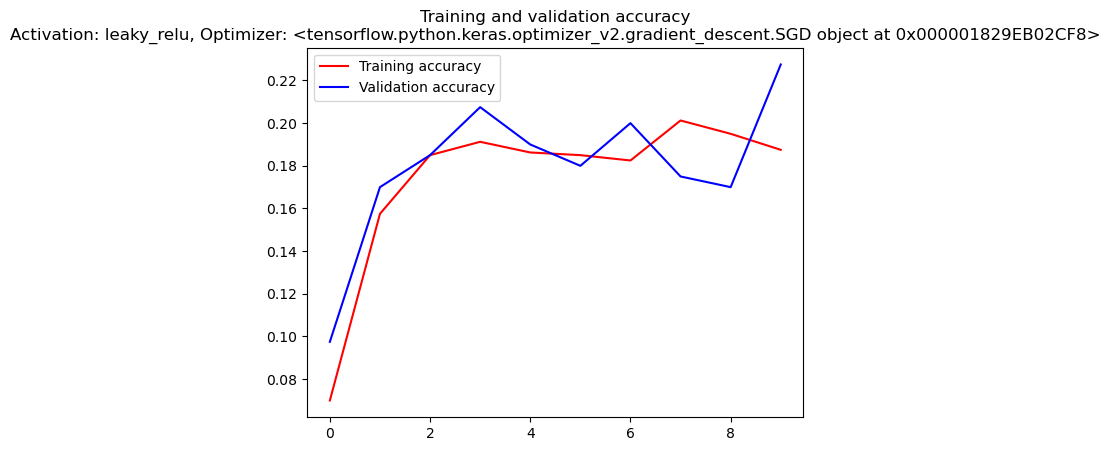

<Figure size 640x480 with 0 Axes>

Activation: leaky_relu, Optimizer: SGD, Learning Rate: 0.0010000000474974513, Test Accuracy: 0.18575957417488098
Epoch 1/10
40/40 - 8s - loss: 2.5260 - accuracy: 0.1650 - val_loss: 2.2710 - val_accuracy: 0.1700
Epoch 2/10
40/40 - 8s - loss: 2.2280 - accuracy: 0.1775 - val_loss: 2.2443 - val_accuracy: 0.1750
Epoch 3/10
40/40 - 8s - loss: 2.2143 - accuracy: 0.1863 - val_loss: 2.1776 - val_accuracy: 0.2025
Epoch 4/10
40/40 - 9s - loss: 2.1970 - accuracy: 0.2062 - val_loss: 2.2505 - val_accuracy: 0.1475
Epoch 5/10
40/40 - 8s - loss: 2.2297 - accuracy: 0.1927 - val_loss: 2.1931 - val_accuracy: 0.1925
Epoch 6/10
40/40 - 8s - loss: 2.2125 - accuracy: 0.1663 - val_loss: 2.2098 - val_accuracy: 0.1975
Epoch 7/10
40/40 - 8s - loss: 2.2089 - accuracy: 0.1825 - val_loss: 2.1861 - val_accuracy: 0.2150
Epoch 8/10
40/40 - 8s - loss: 2.2088 - accuracy: 0.2000 - val_loss: 2.2072 - val_accuracy: 0.2000
Epoch 9/10
40/40 - 8s - loss: 2.1697 - accuracy: 0.1988 - val_loss: 2.2250 - val_accuracy: 0.1750
Epoch

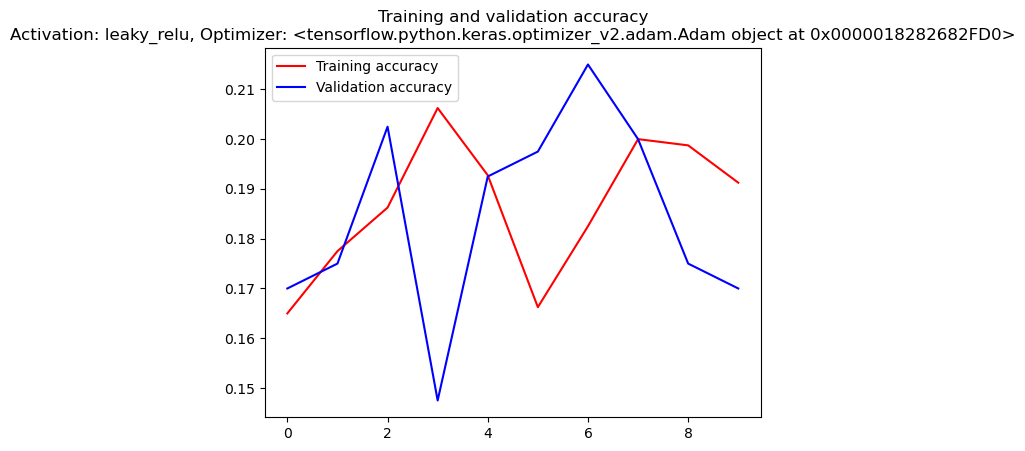

<Figure size 640x480 with 0 Axes>

Activation: leaky_relu, Optimizer: Adam, Learning Rate: 0.0010000000474974513, Test Accuracy: 0.20313991606235504
Epoch 1/10
40/40 - 8s - loss: 2.2372 - accuracy: 0.1850 - val_loss: 2.1596 - val_accuracy: 0.1950
Epoch 2/10
40/40 - 8s - loss: 2.1403 - accuracy: 0.2188 - val_loss: 2.1274 - val_accuracy: 0.2250
Epoch 3/10
40/40 - 8s - loss: 2.0710 - accuracy: 0.2575 - val_loss: 2.0894 - val_accuracy: 0.2575
Epoch 4/10
40/40 - 8s - loss: 1.9840 - accuracy: 0.2962 - val_loss: 2.0419 - val_accuracy: 0.2775
Epoch 5/10
40/40 - 8s - loss: 2.0290 - accuracy: 0.2688 - val_loss: 1.9195 - val_accuracy: 0.3450
Epoch 6/10
40/40 - 9s - loss: 1.9733 - accuracy: 0.2725 - val_loss: 1.9153 - val_accuracy: 0.2975
Epoch 7/10
40/40 - 9s - loss: 1.9327 - accuracy: 0.3137 - val_loss: 1.8627 - val_accuracy: 0.3300
Epoch 8/10
40/40 - 8s - loss: 1.8991 - accuracy: 0.3288 - val_loss: 1.9006 - val_accuracy: 0.3425
Epoch 9/10
40/40 - 9s - loss: 1.8730 - accuracy: 0.3475 - val_loss: 1.8640 - val_accuracy: 0.3700
Epoc

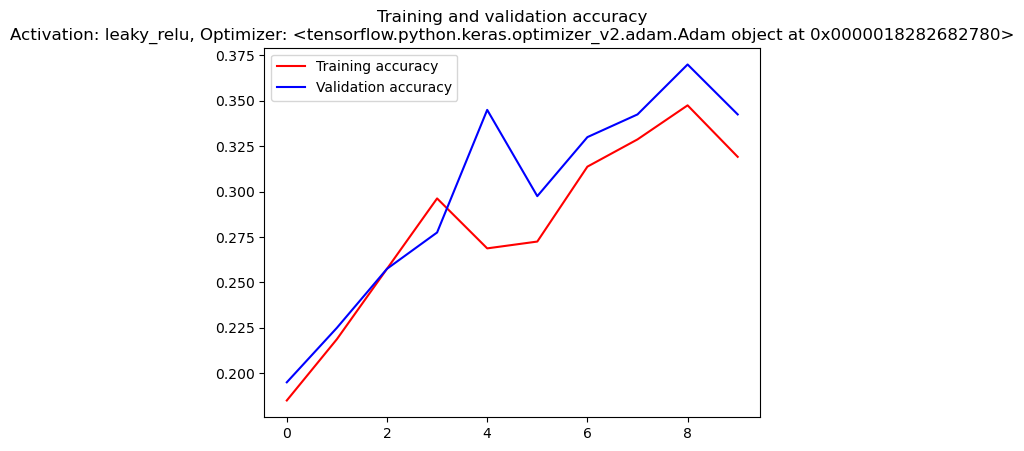

<Figure size 640x480 with 0 Axes>

Activation: leaky_relu, Optimizer: Adam, Learning Rate: 9.999999747378752e-05, Test Accuracy: 0.3505863547325134
Epoch 1/10
40/40 - 9s - loss: 2.3316 - accuracy: 0.1562 - val_loss: 2.3339 - val_accuracy: 0.0850
Epoch 2/10
40/40 - 8s - loss: 2.2381 - accuracy: 0.1925 - val_loss: 2.1501 - val_accuracy: 0.2275
Epoch 3/10
40/40 - 8s - loss: 2.1638 - accuracy: 0.2125 - val_loss: 2.1534 - val_accuracy: 0.2075
Epoch 4/10
40/40 - 8s - loss: 2.1198 - accuracy: 0.2688 - val_loss: 2.3643 - val_accuracy: 0.1825
Epoch 5/10
40/40 - 9s - loss: 2.0674 - accuracy: 0.2637 - val_loss: 1.9483 - val_accuracy: 0.3200
Epoch 6/10
40/40 - 9s - loss: 2.0078 - accuracy: 0.2887 - val_loss: 1.9551 - val_accuracy: 0.3150
Epoch 7/10
40/40 - 9s - loss: 1.9886 - accuracy: 0.3063 - val_loss: 2.0245 - val_accuracy: 0.3125
Epoch 8/10
40/40 - 9s - loss: 1.9748 - accuracy: 0.3125 - val_loss: 1.9932 - val_accuracy: 0.3250
Epoch 9/10
40/40 - 9s - loss: 1.8587 - accuracy: 0.3525 - val_loss: 1.8994 - val_accuracy: 0.3400
Epoch

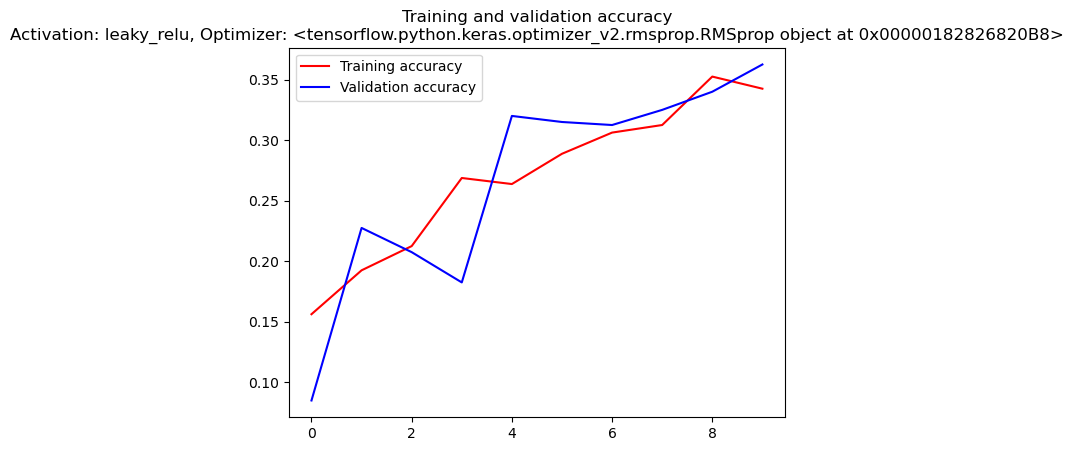

<Figure size 640x480 with 0 Axes>

Activation: leaky_relu, Optimizer: RMSprop, Learning Rate: 0.0010000000474974513, Test Accuracy: 0.32946255803108215
Epoch 1/10
40/40 - 9s - loss: 2.2206 - accuracy: 0.1988 - val_loss: 2.1839 - val_accuracy: 0.2400
Epoch 2/10
40/40 - 11s - loss: 2.2109 - accuracy: 0.1750 - val_loss: 2.2108 - val_accuracy: 0.1750
Epoch 3/10
40/40 - 9s - loss: 2.1655 - accuracy: 0.1875 - val_loss: 2.1483 - val_accuracy: 0.1900
Epoch 4/10
40/40 - 9s - loss: 2.1401 - accuracy: 0.1988 - val_loss: 2.1027 - val_accuracy: 0.2850
Epoch 5/10
40/40 - 9s - loss: 2.1339 - accuracy: 0.2450 - val_loss: 2.0446 - val_accuracy: 0.2750
Epoch 6/10
40/40 - 9s - loss: 2.0960 - accuracy: 0.2438 - val_loss: 2.0759 - val_accuracy: 0.2525
Epoch 7/10
40/40 - 9s - loss: 2.0538 - accuracy: 0.2788 - val_loss: 1.9804 - val_accuracy: 0.3100
Epoch 8/10
40/40 - 9s - loss: 2.0460 - accuracy: 0.2850 - val_loss: 1.9936 - val_accuracy: 0.2425
Epoch 9/10
40/40 - 9s - loss: 1.9730 - accuracy: 0.3100 - val_loss: 1.9530 - val_accuracy: 0.2850


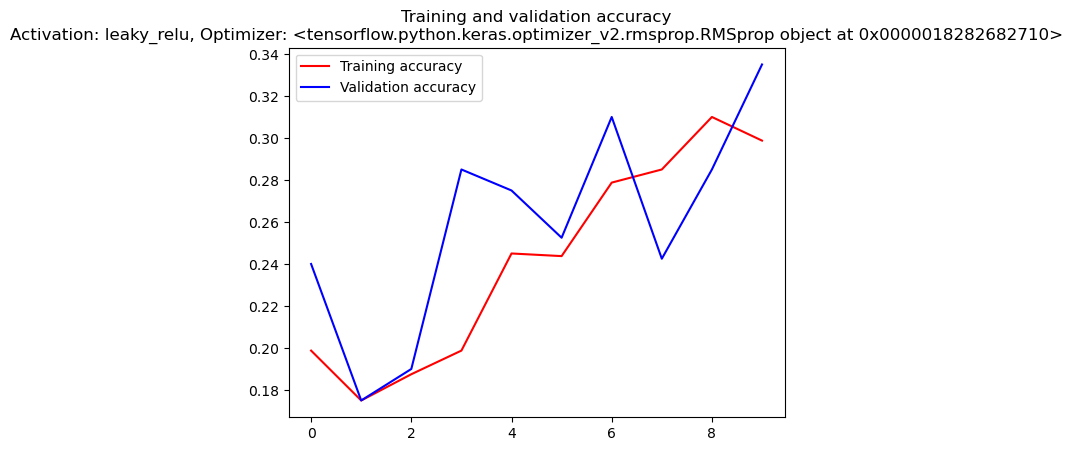

<Figure size 640x480 with 0 Axes>

Activation: leaky_relu, Optimizer: RMSprop, Learning Rate: 9.999999747378752e-05, Test Accuracy: 0.33118146657943726
Activation: relu, Optimizer: SGD, Learning Rate: 0.009999999776482582, Test Accuracy: 0.18266549706459045
Activation: relu, Optimizer: SGD, Learning Rate: 0.0010000000474974513, Test Accuracy: 0.20657779276371002
Activation: relu, Optimizer: Adam, Learning Rate: 0.0010000000474974513, Test Accuracy: 0.29806333780288696
Activation: relu, Optimizer: Adam, Learning Rate: 9.999999747378752e-05, Test Accuracy: 0.31361013650894165
Activation: relu, Optimizer: RMSprop, Learning Rate: 0.0010000000474974513, Test Accuracy: 0.365751177072525
Activation: relu, Optimizer: RMSprop, Learning Rate: 9.999999747378752e-05, Test Accuracy: 0.31697162985801697
Activation: elu, Optimizer: SGD, Learning Rate: 0.009999999776482582, Test Accuracy: 0.2772069275379181
Activation: elu, Optimizer: SGD, Learning Rate: 0.0010000000474974513, Test Accuracy: 0.19714275002479553
Activation: elu, Optimiz

In [81]:
# Define a function to create the CNN model
def build_cnn_model(activation):
    model = tf.keras.Sequential()
    
    # Define the first convolutional layer
    model.add(Conv2D(24, (3, 3), input_shape=(150, 150, 3)))  # Adjust color_mode if necessary
    if activation == 'leaky_relu':
        model.add(LeakyReLU(alpha=0.01))
    else:
        model.add(tf.keras.layers.Activation(activation))
    
    # Define the first max pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Define the second convolutional layer
    model.add(Conv2D(36, (3, 3)))
    if activation == 'leaky_relu':
        model.add(LeakyReLU(alpha=0.01))
    else:
        model.add(tf.keras.layers.Activation(activation))
    
    # Define the second max pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Define the third convolutional layer
    model.add(Conv2D(48, (3, 3)))
    if activation == 'leaky_relu':
        model.add(LeakyReLU(alpha=0.01))
    else:
        model.add(tf.keras.layers.Activation(activation))
    
    # Define the third max pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Add Flatten layer
    model.add(Flatten())
    
    model.add(Dense(512))
    if activation == 'leaky_relu':
        model.add(LeakyReLU(alpha=0.01))
    else:
        model.add(tf.keras.layers.Activation(activation))
    
    model.add(Dense(128))
    if activation == 'leaky_relu':
        model.add(LeakyReLU(alpha=0.01))
    else:
        model.add(tf.keras.layers.Activation(activation))
    
    # Define the last Dense layer to output the classification probabilities
    model.add(Dense(10, activation='softmax'))
    
    return model

# Define lists of activation functions and optimizers to test
activation_functions = ['relu', 'elu', 'selu','leaky_relu']
optimizers = [    
    SGD(learning_rate=0.01),
    SGD(learning_rate=0.001),
    Adam(learning_rate=0.001),
    Adam(learning_rate=0.0001),
    RMSprop(learning_rate=0.001),
    RMSprop(learning_rate=0.0001)
    ]

# Dictionary to store the results
results = {}

# Loop through activation functions and optimizers
for activation in activation_functions:
    for optimizer in optimizers:
        
        # Build the model with the given activation function
        model = build_cnn_model(activation)
        
        # Compile the model with the given optimizer
        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
        
        # Train the model
        history = model.fit(
            train_generator,
            validation_data=validation_generator,
            steps_per_epoch=40,
            epochs=10,
            validation_steps=20,
            verbose=2
        )
        
        # Evaluate the model
        test_loss, test_acc = model.evaluate(validation_generator, verbose=2)
        
        # Plot training and validation accuracy
        acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']
        epochs = range(len(acc))
        
        plt.plot(epochs, acc, 'r', label='Training accuracy')
        plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
        plt.title(f'Training and validation accuracy\nActivation: {activation}, Optimizer: {optimizer}')
        plt.legend(loc=0)
        plt.figure()
        plt.show()
        
        # Store the results
        opt_name = type(optimizer).__name__
        learning_rate = optimizer.learning_rate.numpy()
        results[(activation, opt_name, learning_rate)] = {'test_loss': test_loss, 'test_acc': test_acc}
        
        print(f"Activation: {activation}, Optimizer: {opt_name}, Learning Rate: {learning_rate}, Test Accuracy: {test_acc}")

# Print the final results
for key, value in results.items():
    print(f"Activation: {key[0]}, Optimizer: {key[1]}, Learning Rate: {key[2]}, Test Accuracy: {value['test_acc']}")

In [83]:
def build_cnn_model(activation='relu', optimizer='adam', learning_rate=0.001):
    model = tf.keras.Sequential([
        Conv2D(24, (3, 3), activation=activation, input_shape=(150, 150, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(36, (3, 3), activation=activation),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(48, (3, 3), activation=activation),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(1024, activation=activation),
        Dense(512, activation=activation),
        Dense(128, activation=activation),
        Dense(10, activation='softmax')
    ])
    
    opt = Adam(learning_rate=learning_rate) if optimizer == 'adam' else optimizer
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model using KerasClassifier
model = KerasClassifier(build_fn=build_cnn_model, epochs=10, batch_size=32, verbose=2)
model = build_cnn_model(activation)

# Define the hyperparameter grid
param_grid = {
    'activation': ['leaky_relu', 'relu', 'elu', 'selu'],
    'optimizer': ['adam', 'sgd', 'RMSprop'],
    'learning_rate': [0.001, 0.0001]
}

# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid_result = grid.fit(train_generator, validation_data=validation_generator, steps_per_epoch=len(train_generator), validation_steps=len(validation_generator))

# Summarize the results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

# Get the best model and evaluate it
best_model = grid_result.best_estimator_.model
test_loss, test_acc = best_model.evaluate(validation_generator, verbose=2)

# Plot training and validation accuracy
history = best_model.history

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title(f'Training and validation accuracy\nBest Params: {grid_result.best_params_}')
plt.legend(loc=0)
plt.figure()
plt.show()

NameError: name 'KerasClassifier' is not defined

In [88]:
import os

# Uninstall using conda
os.system('conda uninstall scipy scikit-learn -y')

# Reinstall using conda
os.system('conda install scipy scikit-learn -y')

1

In [91]:
import os

# Uninstall using conda
os.system('conda uninstall numpy -y')

# Reinstall using conda
os.system('conda install numpy -y')

0

In [92]:
import os

# Uninstall using conda
os.system('conda uninstall scikit-learn -y')

# Reinstall using conda
os.system('conda install scikit-learn -y')

1

In [93]:
import scipy
import sklearn

print(f"Scipy version: {scipy.__version__}")
print(f"Sklearn version: {sklearn.__version__}")

Scipy version: 1.7.3


AttributeError: module 'sklearn' has no attribute '__version__'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=True,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

plot_confusion_matrix(actual_labels, predicted_labels, classes=['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo'], normalize=True)
plt.show()


NameError: name 'actual_labels' is not defined

In [ ]:
cnn_model = build_cnn_model()
# Initialize the model by passing some data through
cnn_model.predict(train_images[[0]])
# Print the summary of the layers in the model.
print(cnn_model.summary())